In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os
from env import get_connection

# from matplotlib import style
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# pd.plotting.register_matplotlib_converters()

In [2]:
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']
df = pd.read_csv("anonymized-curriculum-access.txt", 
                 sep="\s", 
                 header=None, 
                 names = colnames, 
                 usecols=[0, 2, 3, 4, 5])
df.head()

date                             endpoint  user_id  cohort_id  \
0  2018-01-26                                    /        1        8.0   
1  2018-01-26                              java-ii        1        8.0   
2  2018-01-26  java-ii/object-oriented-programming        1        8.0   
3  2018-01-26   slides/object_oriented_programming        1        8.0   
4  2018-01-26            javascript-i/conditionals        2       22.0   

      source_ip  
0  97.105.19.61  
1  97.105.19.61  
2  97.105.19.61  
3  97.105.19.61  
4  97.105.19.61

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       900223 non-null  object 
 1   endpoint   900222 non-null  object 
 2   user_id    900223 non-null  int64  
 3   cohort_id  847330 non-null  float64
 4   source_ip  900223 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 34.3+ MB


In [4]:
df.describe()

user_id      cohort_id
count  900223.000000  847330.000000
mean      458.825707      48.501049
std       249.296767      32.795482
min         1.000000       1.000000
25%       269.000000      28.000000
50%       475.000000      33.000000
75%       660.000000      57.000000
max       981.000000     139.000000

In [5]:
df.isna().sum()

date             0
endpoint         1
user_id          0
cohort_id    52893
source_ip        0
dtype: int64

In [6]:
df.endpoint.value_counts().idxmax

<bound method Series.idxmax of /                                                               50313
search/search_index.json                                        19519
javascript-i                                                    18983
toc                                                             18297
java-iii                                                        13733
                                                                ...  
javascript/loops                                                    1
content/control-structures-ii                                       1
javascript-ii/promisesdfghjkjhgfs                                   1
app                                                                 1
appendix/professional-development/post-interview-review-form        1
Name: endpoint, Length: 2313, dtype: int64>

In [7]:
lesson_traffic = df.groupby(['endpoint', 'cohort_id'])['user_id'].nunique().reset_index()

most_popular_lessons = lesson_traffic.groupby('endpoint')['user_id'].mean().idxmax()

result = lesson_traffic[lesson_traffic['endpoint'].isin([most_popular_lessons])]

In [8]:
result

endpoint  cohort_id  user_id
7         /        1.0       17
8         /        2.0        3
9         /        4.0        1
10        /        5.0        1
11        /        6.0        2
12        /        7.0        6
13        /        8.0        5
14        /        9.0        1
15        /       11.0        5
16        /       12.0        4
17        /       13.0        9
18        /       14.0       10
19        /       15.0        4
20        /       16.0        5
21        /       17.0       12
22        /       18.0       13
23        /       19.0       17
24        /       21.0       28
25        /       22.0       35
26        /       23.0       33
27        /       24.0       34
28        /       25.0       26
29        /       26.0       20
30        /       27.0       28
31        /       28.0       50
32        /       29.0       25
33        /       31.0       28
34        /       32.0       22
35        /       33.0       29
36        /       34.0       23
37        /       51.0       27
38        /       52.0       28
39        /       53.0       29
40        /       55.0       21
41        /       56.0       24
42        /       57.0       28
43        /       58.0       22
44        /       59.0       29
45        /       61.0       23
46        /       62.0       33
47        /      132.0       23
48        /      133.0       17
49        /      134.0       20
50        /      135.0       31
51        /      137.0       21
52        /      138.0       37
53        /      139.0       26

## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
   

In [9]:
# Constant (to generate filename for csv)
filename = 'curriculum_logs_data.csv'

# Acquire data.
# ----------------------ACQUIRE FUNCTION---------------------------------
def acquire_curlogs():

    '''
    function created to search/retrieve curriculum_logs for codeup exercise
    '''

    if os.path.isfile(filename):
        # If the CSV file exists, read it directly
        return pd.read_csv(filename)
        
    else: 
        query = '''
                SELECT date, path AS endpoint, user_id, cohort_id, ip AS source_ip, name, program_id
                FROM cohorts
                LEFT JOIN logs ON cohorts.id = logs.user_id;
                '''

        url = get_connection('curriculum_logs')
                
        df = pd.read_sql(query, url)

        df['date'] = pd.to_datetime(df['date'])
        
        df.to_csv(filename, index=False)

        return df

In [10]:
df = acquire_curlogs()

In [11]:
df.head()

date                                endpoint  user_id  cohort_id  \
0  2018-02-01  spring/fundamentals/form-model-binding        1        8.0   
1  2018-02-01                       javascript-ii/es6        1        8.0   
2  2018-02-01                           javascript-ii        1        8.0   
3  2018-02-01                                       /        1        8.0   
4  2018-01-31                     javascript-i/arrays        1        8.0   

      source_ip    name  program_id  
0  97.105.19.61  Arches           1  
1  97.105.19.61  Arches           1  
2  97.105.19.61  Arches           1  
3  97.105.19.61  Arches           1  
4  97.105.19.61  Arches           1

In [12]:
df = df.dropna()

In [13]:
df.endpoint.value_counts()

/                                                                  5005
index.html                                                         1493
javascript-i                                                       1459
spring                                                             1346
java-iii                                                           1184
                                                                   ... 
5-stats/2.5-distributions-and-testing                                 1
5-stats/2.4-power-analysis                                            1
11-nlp/word-2-vec.md                                                  1
content/php_ii/control-structures-ii/gitbook/images/favicon.ico       1
10-anomaly-detection/2-continuous-probabilistic-methods.md            1
Name: endpoint, Length: 1436, dtype: int64

In [14]:
df = df[df['endpoint'] != '/']

In [15]:
df_wd = df[df['endpoint'].str.contains('javascript|css|html|bootstrap|web-design|jquery|mkdocs', case=False)]

In [16]:
df_wd.head()

date                  endpoint  user_id  cohort_id     source_ip  \
1   2018-02-01         javascript-ii/es6        1        8.0  97.105.19.61   
2   2018-02-01             javascript-ii        1        8.0  97.105.19.61   
4   2018-01-31       javascript-i/arrays        1        8.0  97.105.19.61   
5   2018-01-31    javascript-i/functions        1        8.0  97.105.19.61   
11  2018-01-30  mkdocs/search_index.json        1        8.0  97.105.19.61   

      name  program_id  
1   Arches           1  
2   Arches           1  
4   Arches           1  
5   Arches           1  
11  Arches           1

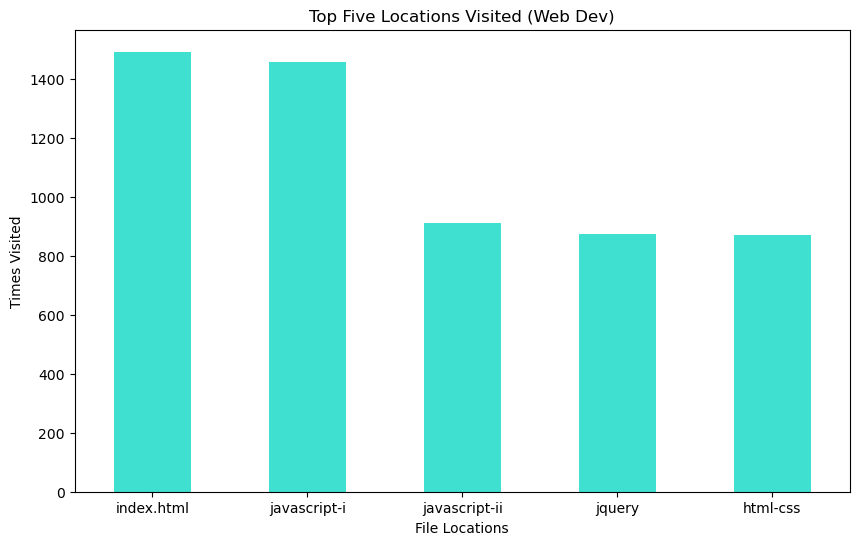

In [17]:
top_five_endpoints = df_wd['endpoint'].value_counts().head(5)

top_five_endpoints.plot(kind='bar', figsize=(10, 6), color='turquoise')
plt.title('Top Five Locations Visited (Web Dev)')
plt.xlabel('File Locations')
plt.ylabel('Times Visited')
plt.xticks(rotation=0)
plt.show()

In [18]:
df_cloud = df[df['endpoint'].str.contains('spring|flask|virtual-enviornments|ajax|php', case=False)]  

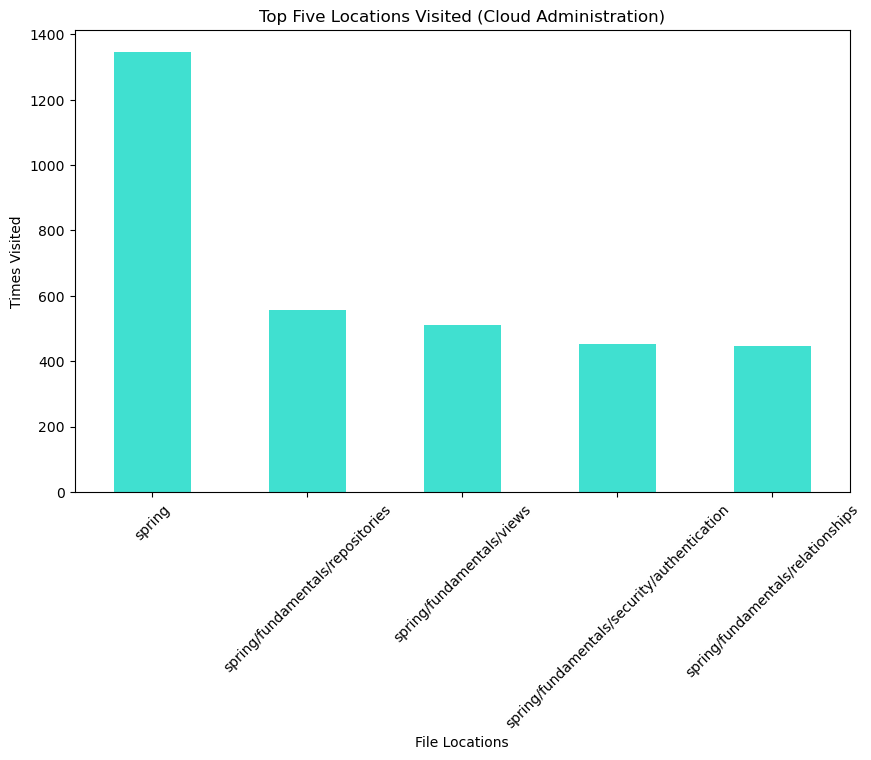

In [19]:
top_five_endpoints = df_cloud['endpoint'].value_counts().head(5)

top_five_endpoints.plot(kind='bar', figsize=(10, 6), color='turquoise')
plt.title('Top Five Locations Visited (Cloud Administration)')
plt.xlabel('File Locations')
plt.ylabel('Times Visited')
plt.xticks(rotation=45)
plt.show()

In [20]:
df_ds = df[~df['endpoint'].str.contains('javascript|html|css|spring|java|bootstrap|web-design|jquery|mkdocs/search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]

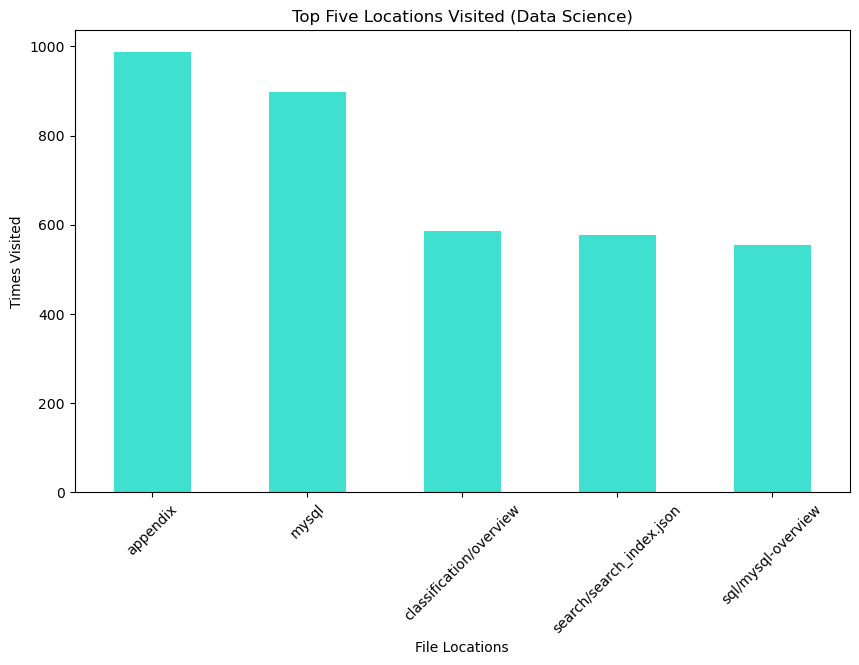

In [21]:
top_five_endpoints = df_ds['endpoint'].value_counts().head(5)
top_five_endpoints.plot(kind='bar', figsize=(10, 6), color='turquoise')
plt.title('Top Five Locations Visited (Data Science)')
plt.xlabel('File Locations')
plt.ylabel('Times Visited')
plt.xticks(rotation=45)
plt.show()

## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [22]:
df.head()

date                                endpoint  user_id  cohort_id  \
0  2018-02-01  spring/fundamentals/form-model-binding        1        8.0   
1  2018-02-01                       javascript-ii/es6        1        8.0   
2  2018-02-01                           javascript-ii        1        8.0   
4  2018-01-31                     javascript-i/arrays        1        8.0   
5  2018-01-31                  javascript-i/functions        1        8.0   

      source_ip    name  program_id  
0  97.105.19.61  Arches           1  
1  97.105.19.61  Arches           1  
2  97.105.19.61  Arches           1  
4  97.105.19.61  Arches           1  
5  97.105.19.61  Arches           1

In [23]:
keywords = ['javascript', 'css', 'html', 'bootstrap', 'web-design', 'jquery', 'mkdocs']

webdev_mask = df['endpoint'].str.contains('|'.join(keywords), case=False)

filtered_df = df[webdev_mask]

In [24]:
filtered_df['cohort_id'] = filtered_df['cohort_id'].astype('int')
filtered_df['cohort_id'] = filtered_df['cohort_id'].astype('object')

In [25]:
filtered_df.head(1)

date           endpoint  user_id cohort_id     source_ip    name  \
1  2018-02-01  javascript-ii/es6        1         8  97.105.19.61  Arches   

   program_id  
1           1

In [26]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22209 entries, 1 to 73738
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        22209 non-null  object
 1   endpoint    22209 non-null  object
 2   user_id     22209 non-null  int64 
 3   cohort_id   22209 non-null  object
 4   source_ip   22209 non-null  object
 5   name        22209 non-null  object
 6   program_id  22209 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [27]:
filtered_df.cohort_id.value_counts()

22    8915
14    3721
28    3167
23    2717
1     1707
21     975
13     394
8      361
18     195
16      57
Name: cohort_id, dtype: int64

In [28]:
df = df[df['endpoint'] != '/']

In [29]:
df_wd = df[df['endpoint'].str.contains('javascript|css|html|bootstrap|web-design|jquery|mkdocs', case=False)]

In [30]:
df_wd.head()

date                  endpoint  user_id  cohort_id     source_ip  \
1   2018-02-01         javascript-ii/es6        1        8.0  97.105.19.61   
2   2018-02-01             javascript-ii        1        8.0  97.105.19.61   
4   2018-01-31       javascript-i/arrays        1        8.0  97.105.19.61   
5   2018-01-31    javascript-i/functions        1        8.0  97.105.19.61   
11  2018-01-30  mkdocs/search_index.json        1        8.0  97.105.19.61   

      name  program_id  
1   Arches           1  
2   Arches           1  
4   Arches           1  
5   Arches           1  
11  Arches           1

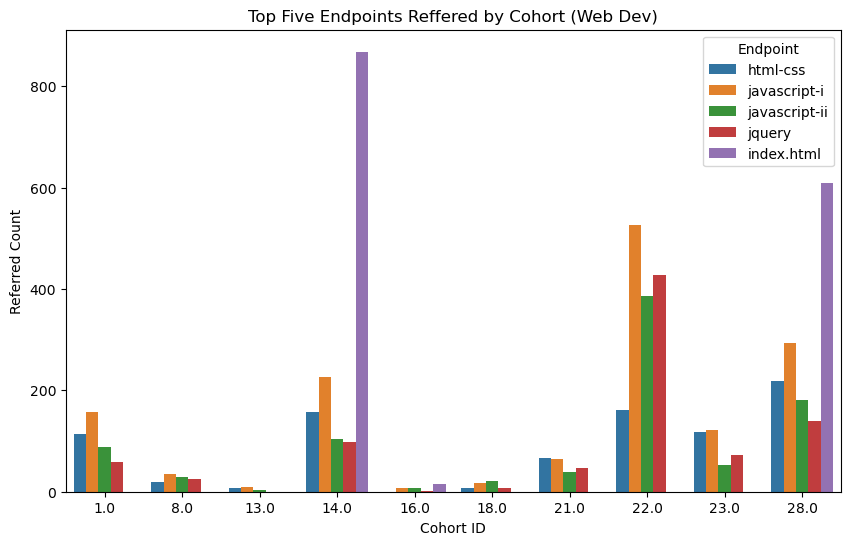

In [31]:
# Group the data by 'cohort_id' and 'endpoint' and count the number of referrals
cohort_endpoint_counts = df_wd.groupby(['cohort_id', 'endpoint']).size().reset_index(name='referred_count')

# Identify the top five lessons referred to across all cohorts
top_five_endpoints = cohort_endpoint_counts.groupby('endpoint')['referred_count'].sum().nlargest(5)

# Filter the cohort_endpoint_counts DataFrame to include only the top five endpoints
filtered_counts = cohort_endpoint_counts[cohort_endpoint_counts['endpoint'].isin(top_five_endpoints.index)]

# Create a bar plot to visualize cohort referrals to the top five endpoints
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_counts, x='cohort_id', y='referred_count', hue='endpoint')
plt.title('Top Five Endpoints Reffered by Cohort (Web Dev)')
plt.xlabel('Cohort ID')
plt.ylabel('Referred Count')
plt.xticks(rotation=0)
plt.legend(title='Endpoint')
plt.show()

In [32]:
df_cloud = df[df['endpoint'].str.contains('spring|flask|virtual-enviornments|ajax|php', case=False)]  

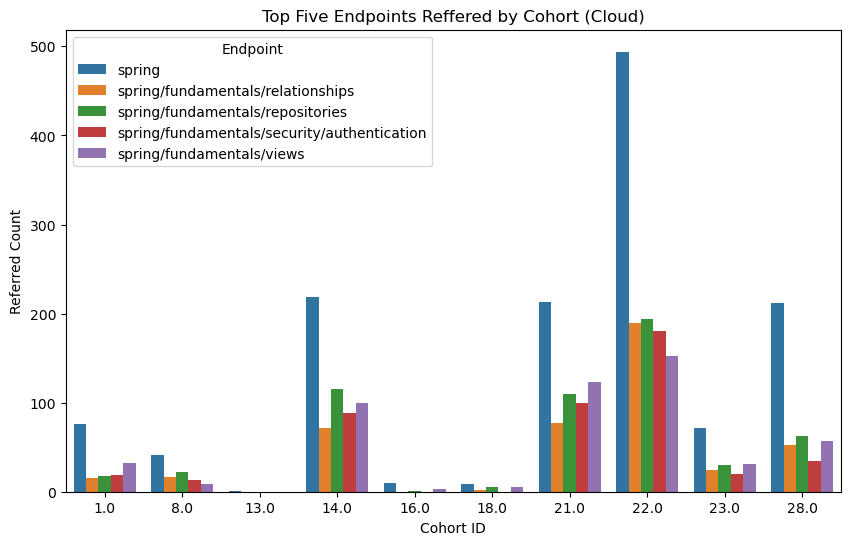

In [33]:
# Group the data by 'cohort_id' and 'endpoint' and count the number of referrals
cohort_endpoint_counts = df_cloud.groupby(['cohort_id', 'endpoint']).size().reset_index(name='referred_count')

# Identify the top five lessons referred to across all cohorts
top_five_endpoints = cohort_endpoint_counts.groupby('endpoint')['referred_count'].sum().nlargest(5)

# Filter the cohort_endpoint_counts DataFrame to include only the top five endpoints
filtered_counts = cohort_endpoint_counts[cohort_endpoint_counts['endpoint'].isin(top_five_endpoints.index)]

# Create a bar plot to visualize cohort referrals to the top five endpoints
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_counts, x='cohort_id', y='referred_count', hue='endpoint')
plt.title('Top Five Endpoints Reffered by Cohort (Cloud)')
plt.xlabel('Cohort ID')
plt.ylabel('Referred Count')
plt.xticks(rotation=0)
plt.legend(title='Endpoint', loc='upper left')
plt.show() 

In [34]:
df_ds = df[~df['endpoint'].str.contains('javascript|html|css|spring|java|bootstrap|web-design|jquery|mkdocs/search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]

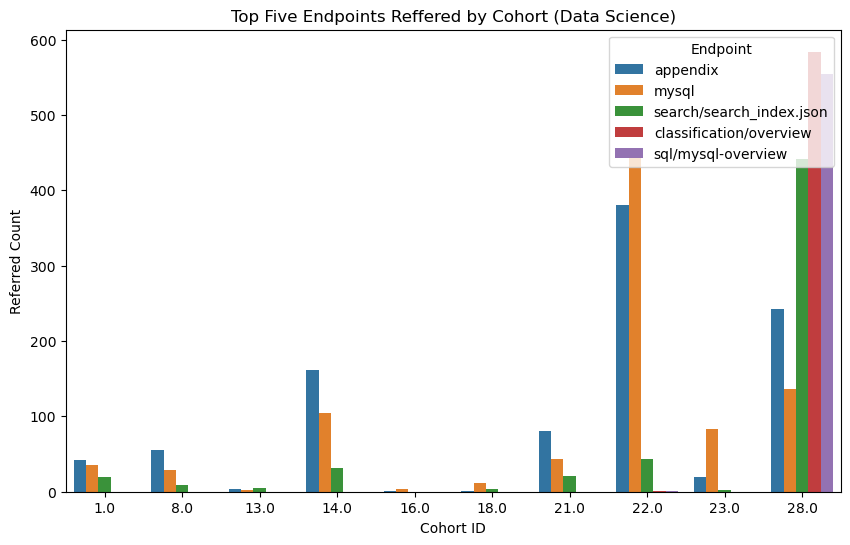

In [35]:
### Group the data by 'cohort_id' and 'endpoint' and count the number of referrals
cohort_endpoint_counts = df_ds.groupby(['cohort_id', 'endpoint']).size().reset_index(name='referred_count')

# Identify the top five lessons referred to across all cohorts
top_five_endpoints = cohort_endpoint_counts.groupby('endpoint')['referred_count'].sum().nlargest(5)

# Filter the cohort_endpoint_counts DataFrame to include only the top five endpoints
filtered_counts = cohort_endpoint_counts[cohort_endpoint_counts['endpoint'].isin(top_five_endpoints.index)]

# Create a bar plot to visualize cohort referrals to the top five endpoints
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_counts, x='cohort_id', y='referred_count', hue='endpoint')
plt.title('Top Five Endpoints Reffered by Cohort (Data Science)')
plt.xlabel('Cohort ID')
plt.ylabel('Referred Count')
plt.xticks(rotation=0)
plt.legend(title='Endpoint')
plt.show()

   
## 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
   

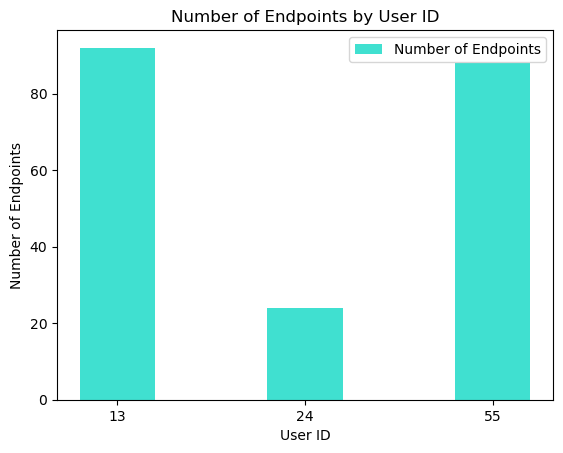

User 13: Most visited endpoint is 'javascript-i/functions' with 12 visits.
User 24: Most visited endpoint is 'mkdocs/search_index.json' with 3 visits.
User 55: Most visited endpoint is 'spring/fundamentals/security/authentication' with 9 visits.


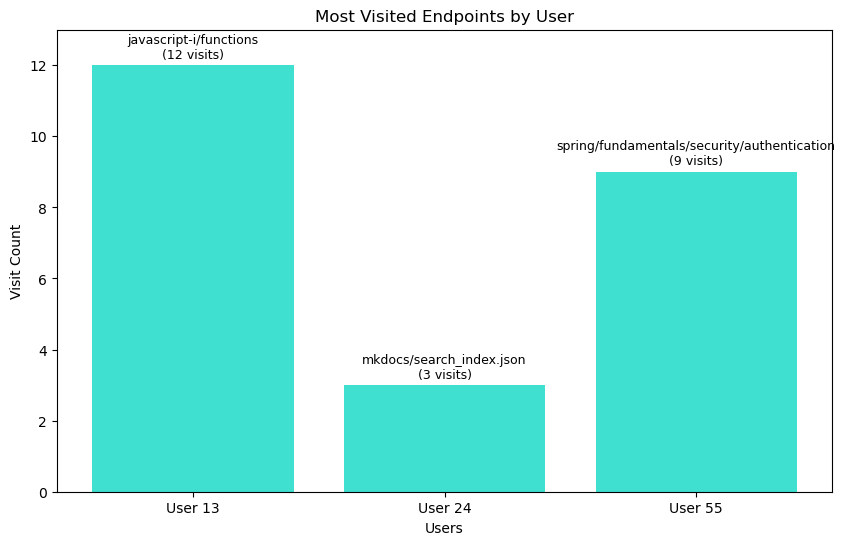

In [36]:
# 1st cell
# Group data by 'user_id' and count interactions
user_activity = df.groupby('user_id')['endpoint'].count().reset_index()
# Define a threshold for inactive users (e.g., less than 5 interactions)
threshold = 100

# 2nd cell
# Identify inactive users
user_activity[user_activity['endpoint'] < threshold]

# 3rd cell
# Example data
user_ids = [13, 24, 55]
num_endpoints = [92, 24, 88]
# Width of each bar
bar_width = 0.4  # Adjust this value as needed
# Calculate the x positions for the bars
x = range(len(user_ids))
# Create a bar plot with specified width
plt.bar(x, num_endpoints, width=bar_width, align='center', label='Number of Endpoints', color = 'turquoise')
# Set the x-tick positions and labels
plt.xticks(x, user_ids)
# Add labels and a title
plt.xlabel('User ID')
plt.ylabel('Number of Endpoints')
plt.title('Number of Endpoints by User ID')
# Show the plot
plt.legend()
plt.show()

# 4th cell
user_ids = [13, 24, 55]
for user_id in user_ids:
    #Filter the data for the current user
    user_data = df[df['user_id'] == user_id]
    #Group the data by 'endpoint' and count occurrences
    endpoint_counts = user_data['endpoint'].value_counts()
    #Find the endpoint with the highest count
    most_visited_endpoint = endpoint_counts.idxmax()
    count = endpoint_counts.max()
    print(f"User {user_id}: Most visited endpoint is '{most_visited_endpoint}' with {count} visits.")
    
# 5th cell
users = ['User 13', 'User 24', 'User 55']
endpoints = ['javascript-i/functions', 'mkdocs/search_index.json', 'spring/fundamentals/security/authentication']
visit_counts = [12, 3, 9]
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(users, visit_counts, color='turquoise')
plt.xlabel('Users')
plt.ylabel('Visit Count')
plt.title('Most Visited Endpoints by User')
plt.ylim(0, max(visit_counts) + 1)
for user, endpoint, count in zip(users, endpoints, visit_counts):
    plt.text(user, count + 0.2, f'{endpoint}\n({count} visits)', ha='center', fontsize=9)
plt.show()

## 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

## Searched for suspicious users based on IP_address

In [37]:
# Check for suspicious IP addresses
ips_activity_counts = df['source_ip'].value_counts()

In [38]:
ips_activity_counts

97.105.19.61      26085
97.105.19.58      14022
76.185.145.231     4347
67.10.174.56       3104
76.185.131.226     2239
                  ...  
172.56.15.6           1
173.127.44.50         1
99.203.155.145        1
196.52.2.70           1
107.77.66.47          1
Name: source_ip, Length: 344, dtype: int64

In [39]:
def acquire(file_name):
    # Read the specified file
    df = pd.read_csv(file_name, sep="\s", header=None, names=colnames, usecols=[0, 2, 3, 4, 5])
    
    # Optionally, you can print the first few rows to check the data
    print(df.head())

    # Return the DataFrame
    return df

def prep(df, user):
    '''
    The prep function resetos the df by user id andsets index as date column which is changes into a datetime object.
    Pages is also created as a column to count the number of times an endpoint is visited daily as counts.
    '''
    df = df[pd.isnull(df['cohort_id'])]
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df['date'])
    df = df.set_index(df.date)
    pages = df['endpoint'].resample('d').count()
    return pages

def compute_pct_b(pages, span, weight, user):
    '''
    Defined function computes the page count for each day and returns a list of dates with corresponding
    pages, midband, ub,	lb, and	pct_b columns.
    '''
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

def plt_bands(my_df, user):
    '''
    Defined function to plot all bands and display the EMA of accessed number of pages over a year
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anomalies(df, user, span, weight):
    '''
    Defined function used to return a series of users and page counts for each user either specifically or for all users.
    '''
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    plt_bands(my_df, user)
    return my_df[my_df.pct_b>1]

In [40]:
# Define column names
colnames = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']

file_name = "anonymized-curriculum-access.txt"
df = acquire(file_name)

         date                             endpoint  user_id  cohort_id  \
0  2018-01-26                                    /        1        8.0   
1  2018-01-26                              java-ii        1        8.0   
2  2018-01-26  java-ii/object-oriented-programming        1        8.0   
3  2018-01-26   slides/object_oriented_programming        1        8.0   
4  2018-01-26            javascript-i/conditionals        2       22.0   

      source_ip  
0  97.105.19.61  
1  97.105.19.61  
2  97.105.19.61  
3  97.105.19.61  
4  97.105.19.61  


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       900223 non-null  object 
 1   endpoint   900222 non-null  object 
 2   user_id    900223 non-null  int64  
 3   cohort_id  847330 non-null  float64
 4   source_ip  900223 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 34.3+ MB


In [42]:
# Filtered by only null cohort_id that are not attached to anything which is pretty sus

In [43]:
df = df[pd.isnull(df['cohort_id'])]

In [44]:
df

date                               endpoint  user_id  cohort_id  \
411     2018-01-26                                      /       48        NaN   
412     2018-01-26  spring/extra-features/form-validation       48        NaN   
425     2018-01-26                                      /       48        NaN   
435     2018-01-26                                      /       48        NaN   
436     2018-01-26              mysql/relationships/joins       48        NaN   
...            ...                                    ...      ...        ...   
899897  2021-04-21                          javascript-ii      717        NaN   
899898  2021-04-21                      javascript-ii/es6      717        NaN   
899899  2021-04-21        javascript-ii/map-filter-reduce      717        NaN   
899900  2021-04-21                 javascript-ii/promises      717        NaN   
899902  2021-04-21              javascript-ii/RESTful-api      717        NaN   

             source_ip  
411       97.105.19.61  
412       97.105.19.61  
425       97.105.19.61  
435       97.105.19.61  
436       97.105.19.61  
...                ...  
899897  136.50.102.126  
899898  136.50.102.126  
899899  136.50.102.126  
899900  136.50.102.126  
899902  136.50.102.126  

[52893 rows x 5 columns]

In [45]:
# Check for suspicious IP addresses
ips_activity_counts = df['source_ip'].value_counts()
ips_activity_counts

97.105.19.58       15931
70.117.16.60        1903
67.11.117.74        1729
70.94.165.107       1715
23.116.170.48       1616
                   ...  
72.181.117.212         1
173.149.221.121        1
96.8.179.87            1
172.124.66.235         1
172.58.111.220         1
Name: source_ip, Length: 413, dtype: int64

In [46]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df.date)
pages = df['endpoint'].resample('d').count()

In [47]:
df.head()

date                               endpoint  user_id  \
date                                                                    
2018-01-26 2018-01-26                                      /       48   
2018-01-26 2018-01-26  spring/extra-features/form-validation       48   
2018-01-26 2018-01-26                                      /       48   
2018-01-26 2018-01-26                                      /       48   
2018-01-26 2018-01-26              mysql/relationships/joins       48   

            cohort_id     source_ip  
date                                 
2018-01-26        NaN  97.105.19.61  
2018-01-26        NaN  97.105.19.61  
2018-01-26        NaN  97.105.19.61  
2018-01-26        NaN  97.105.19.61  
2018-01-26        NaN  97.105.19.61

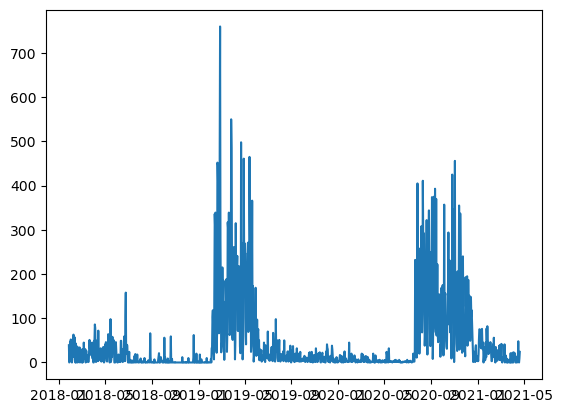

In [48]:
plt.plot(pages)
plt.show()

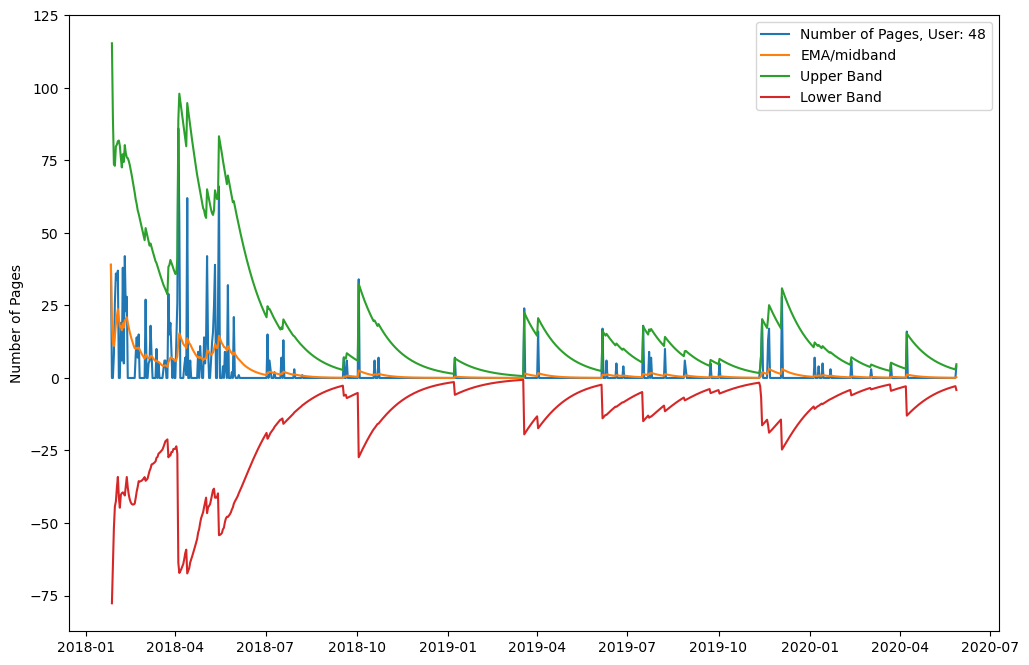

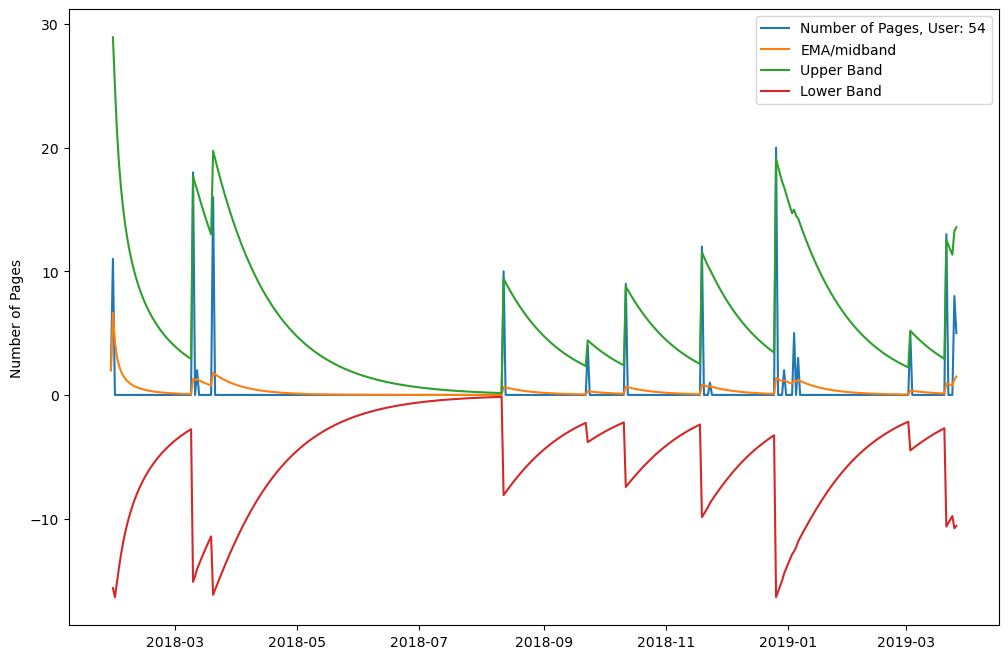

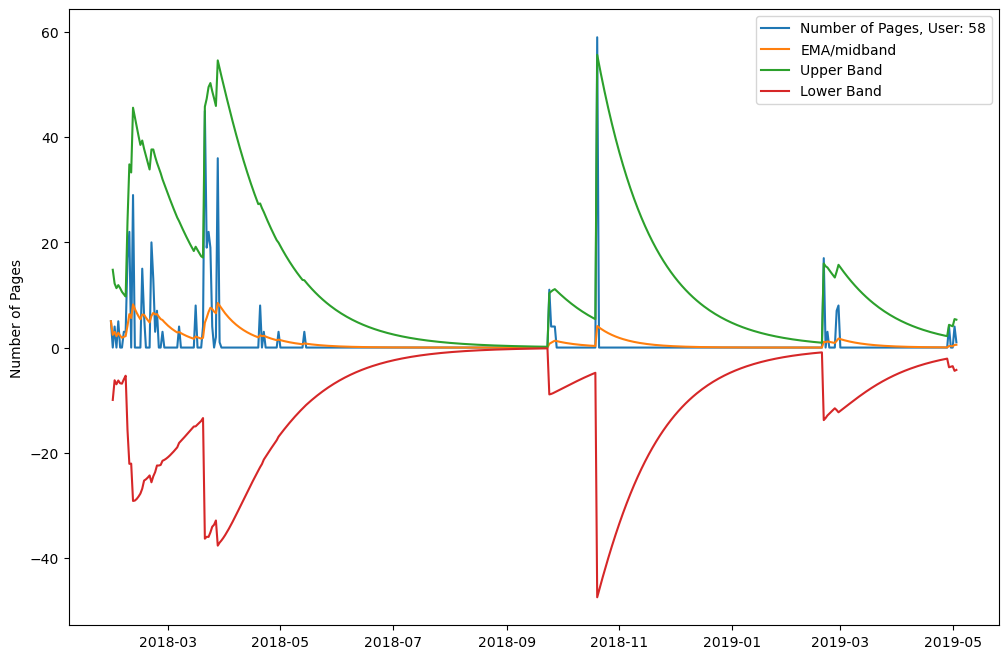

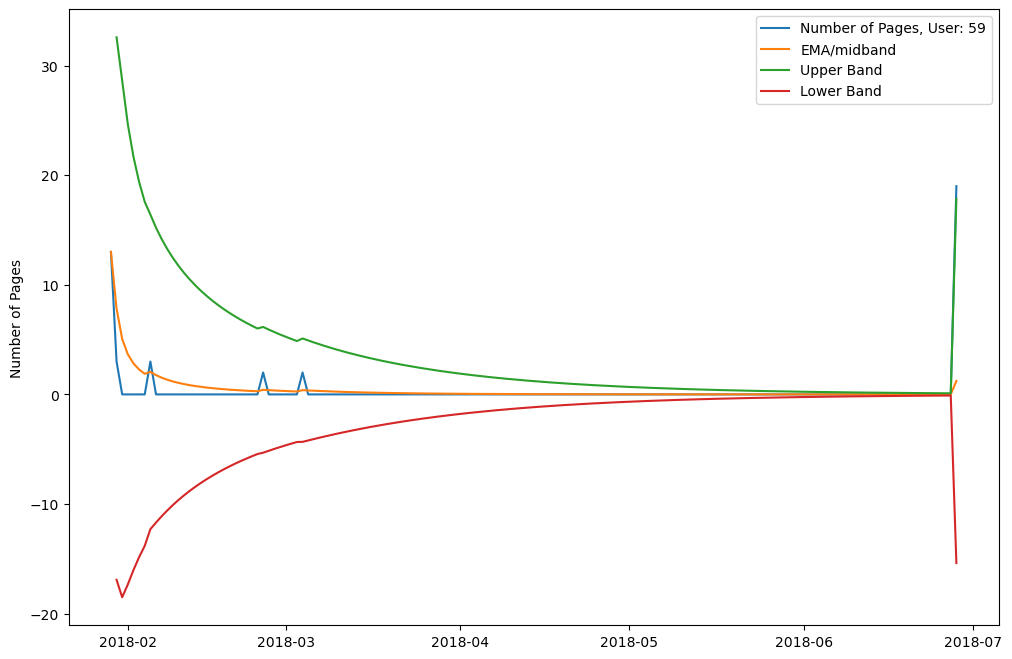

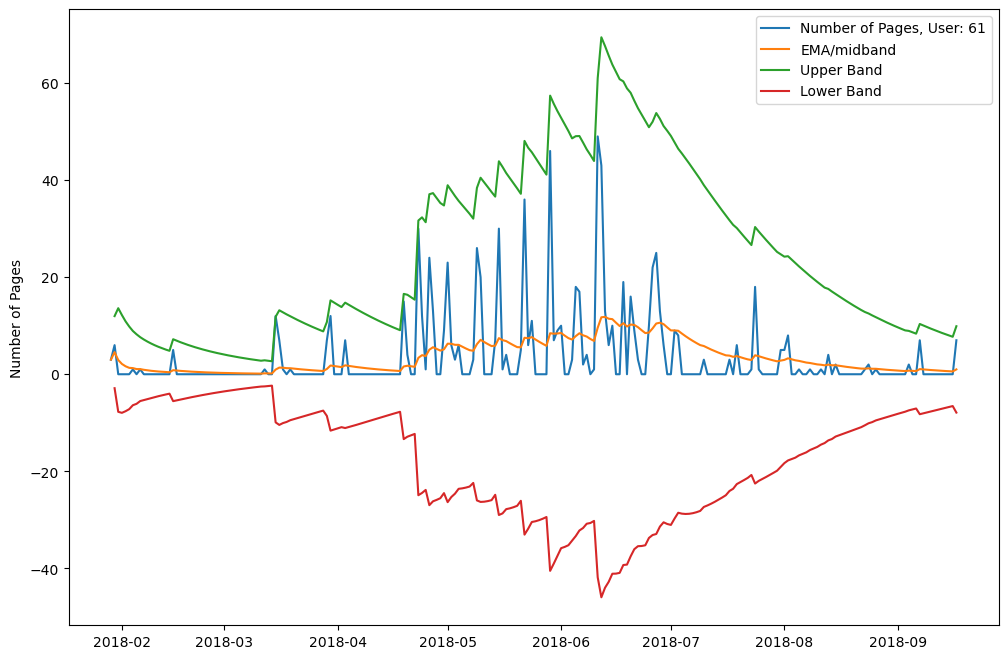

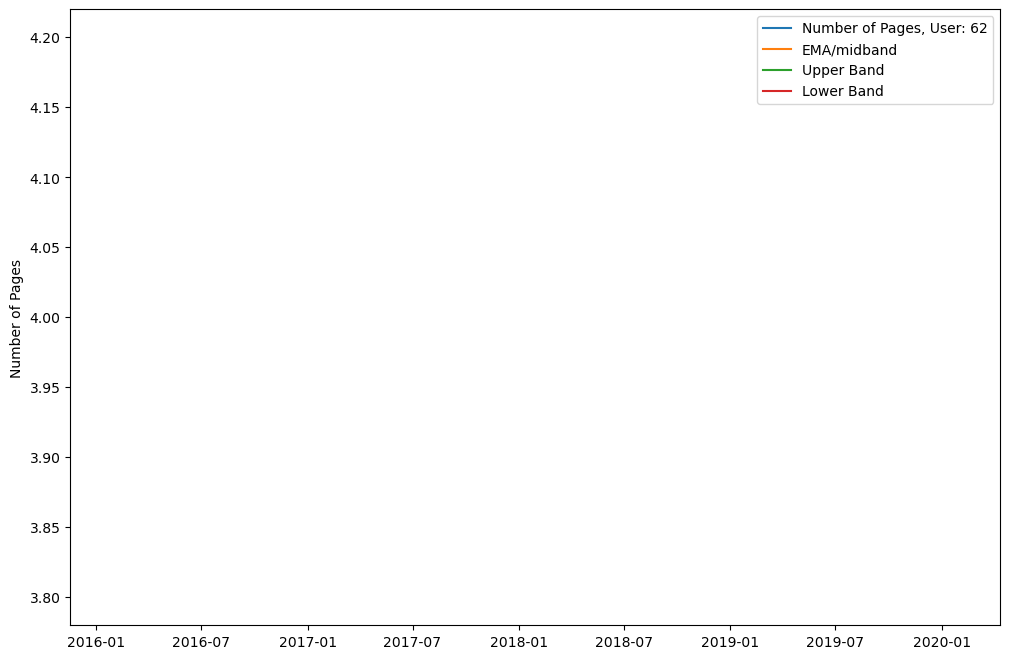

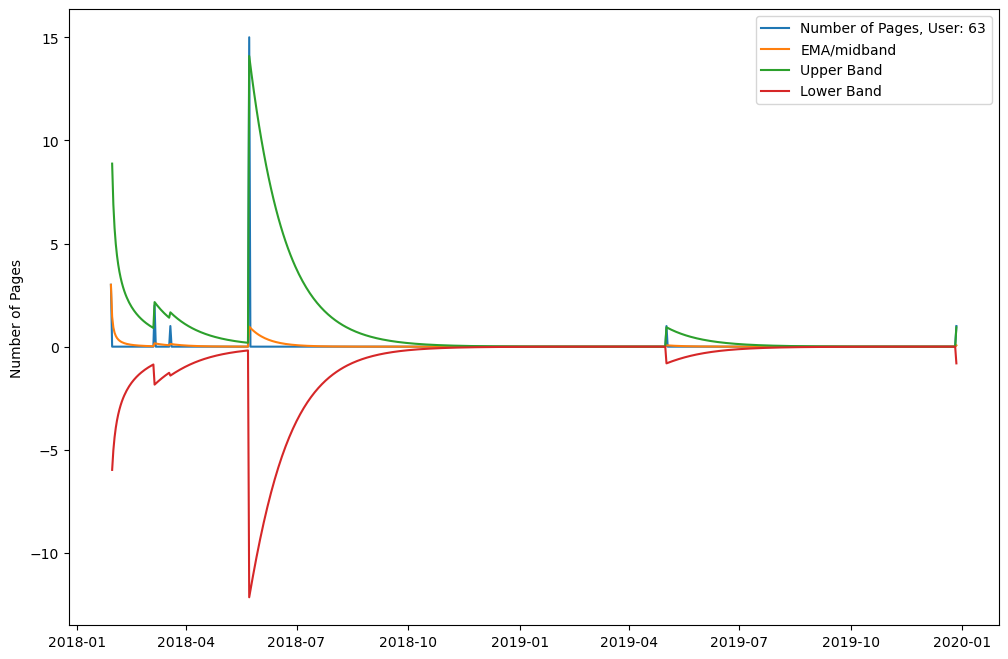

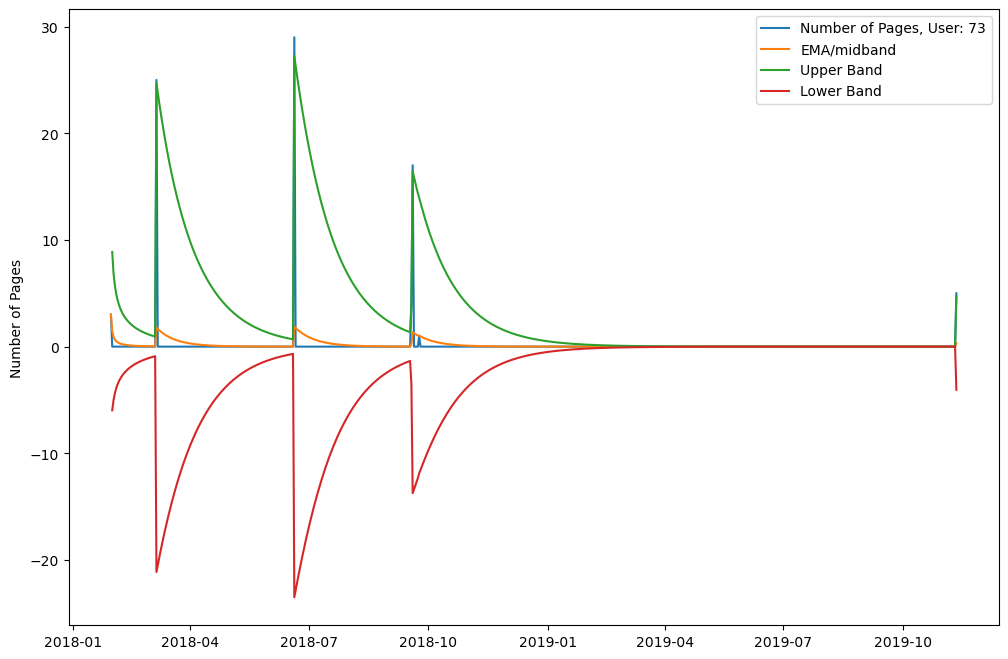

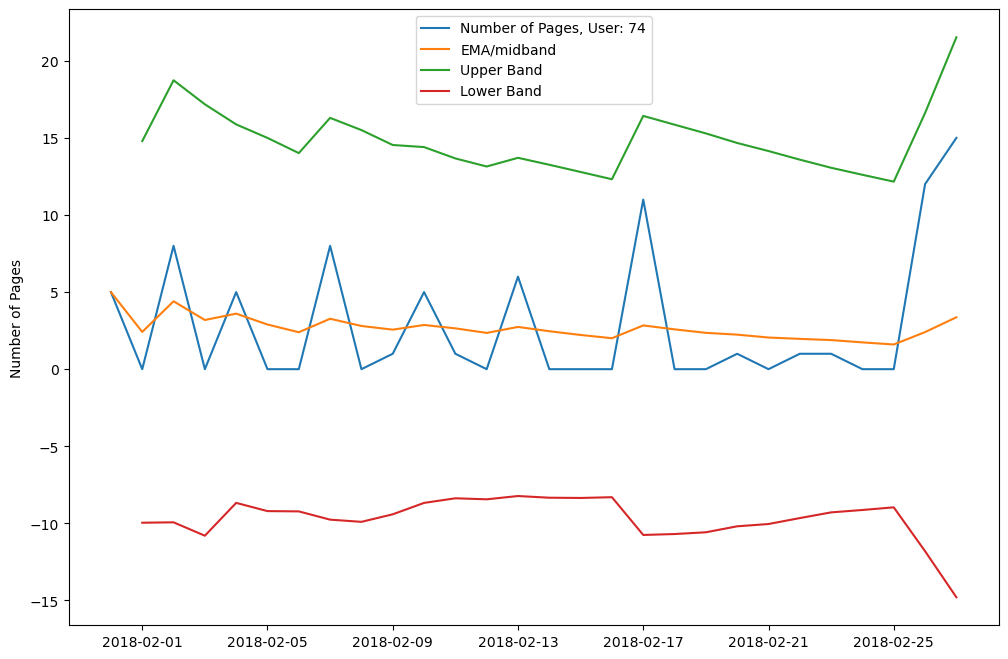

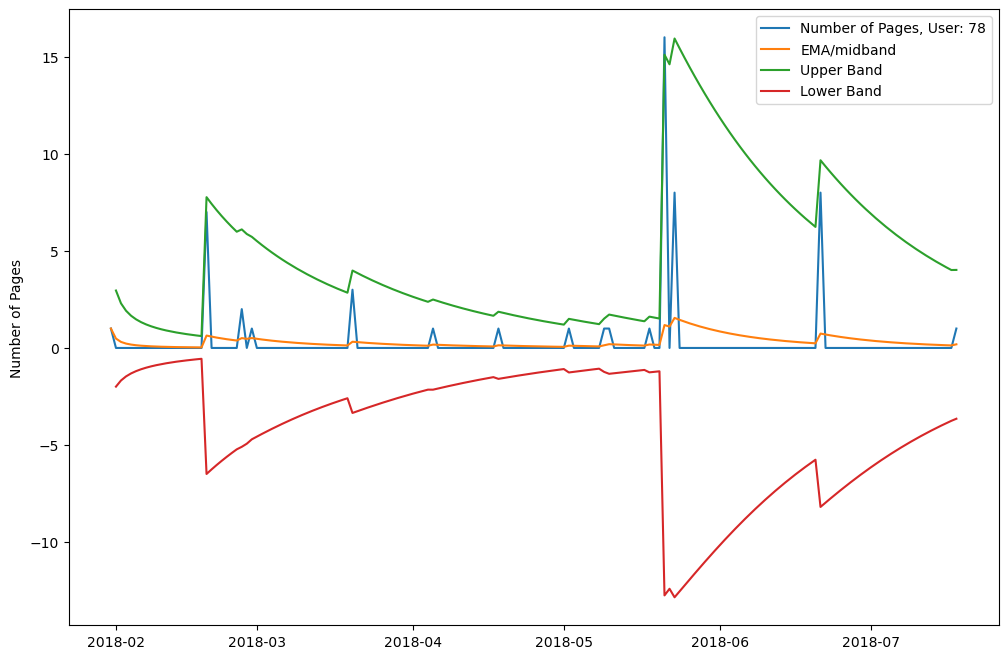

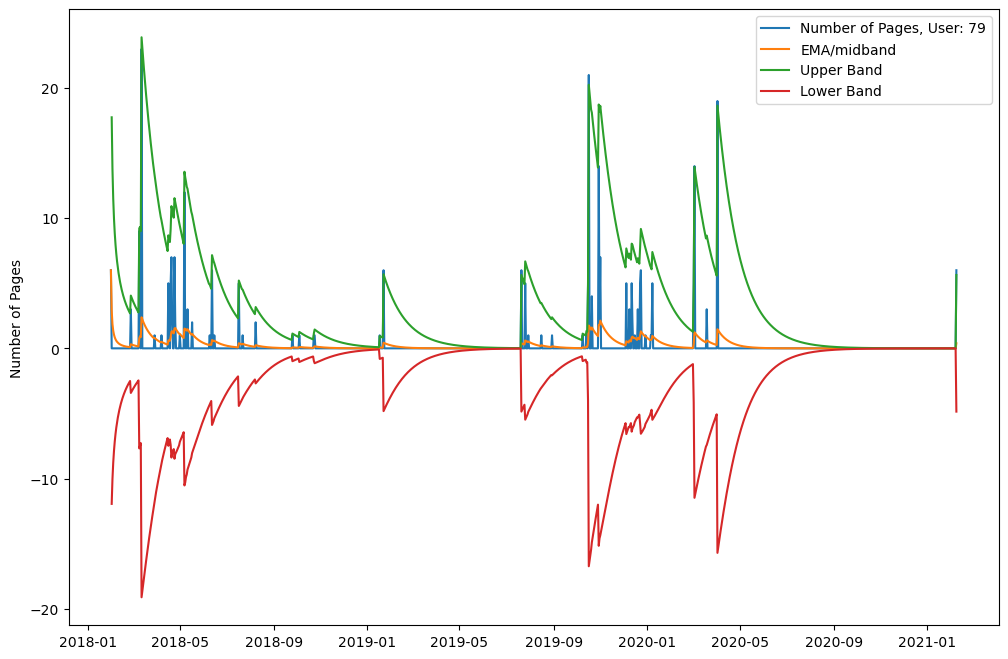

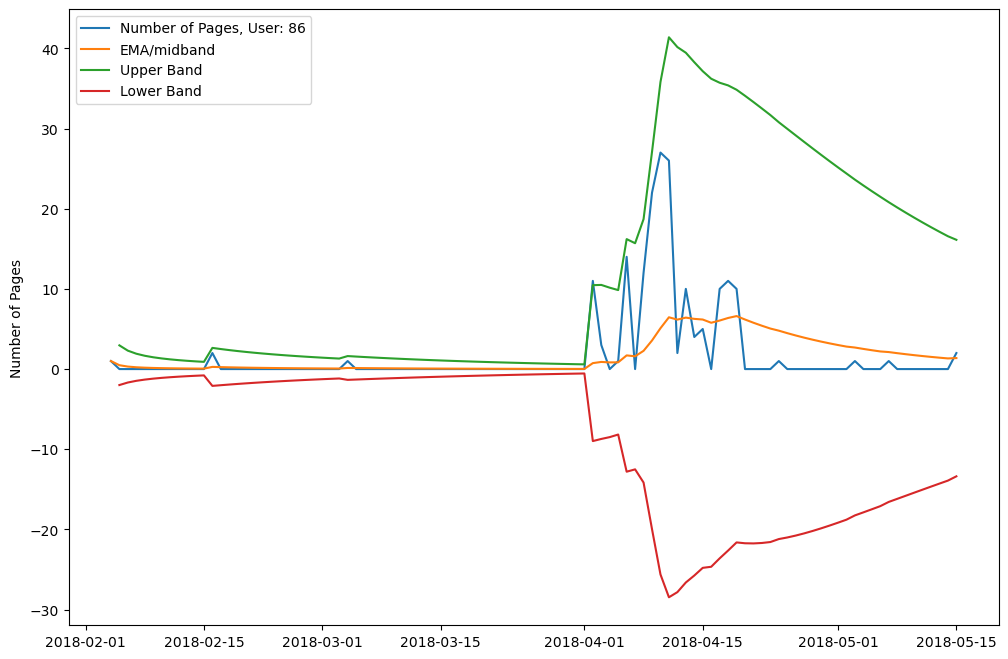

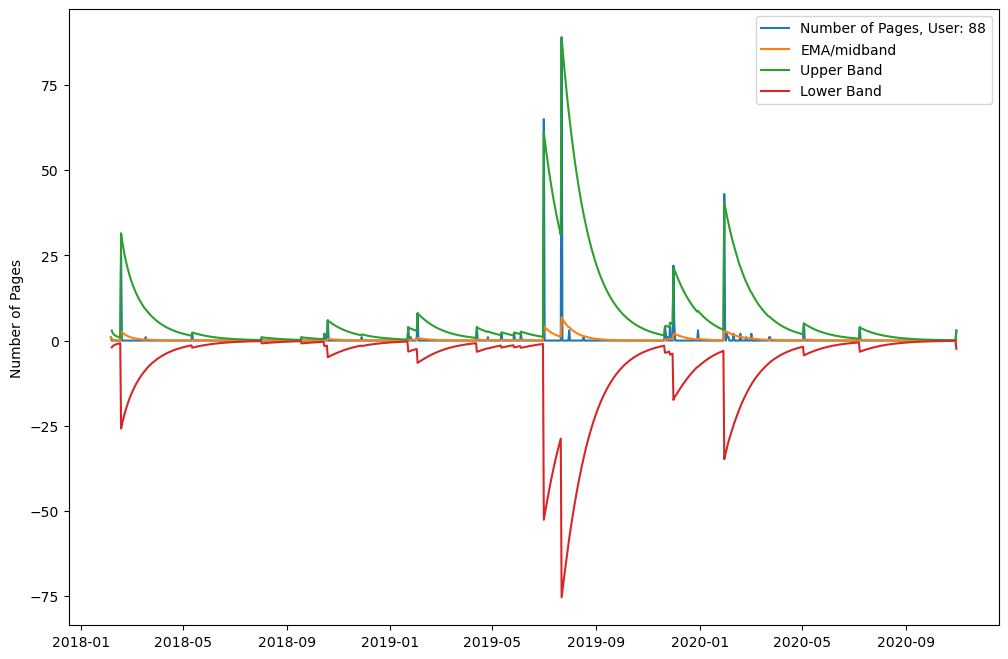

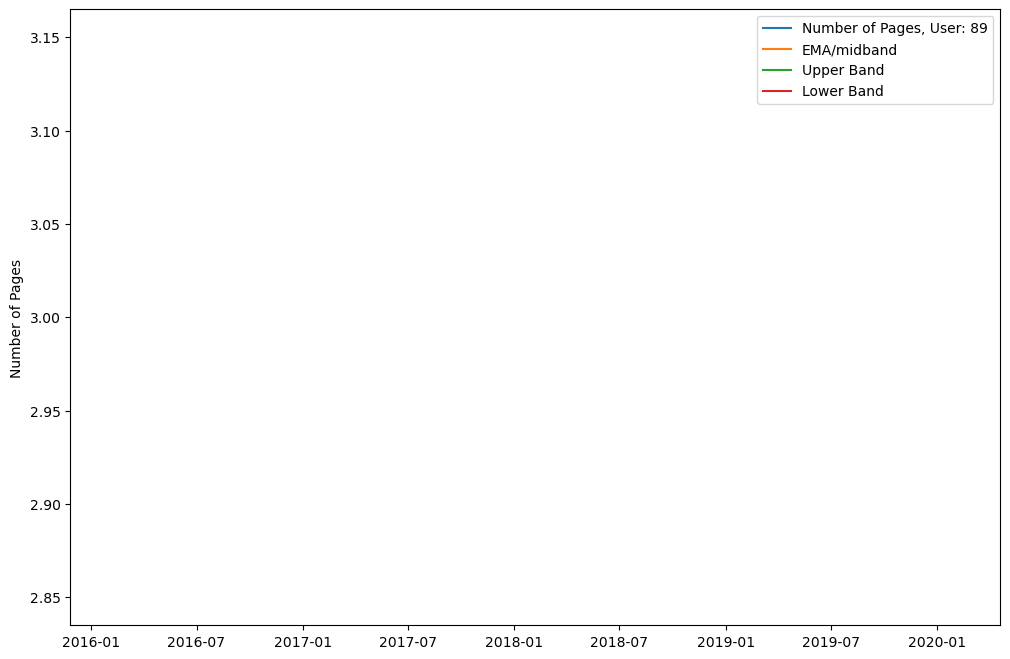

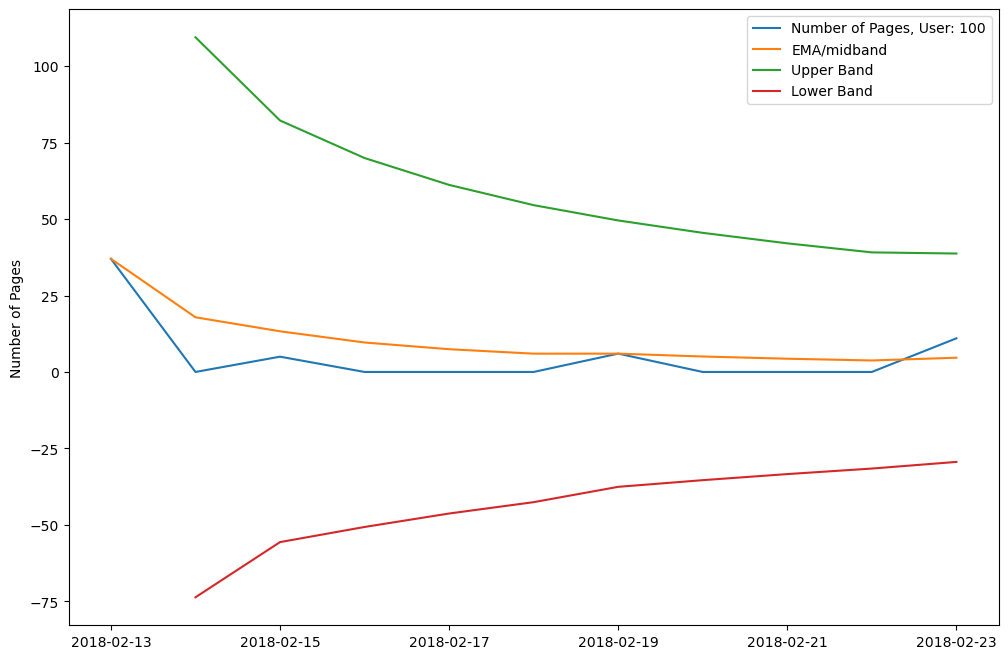

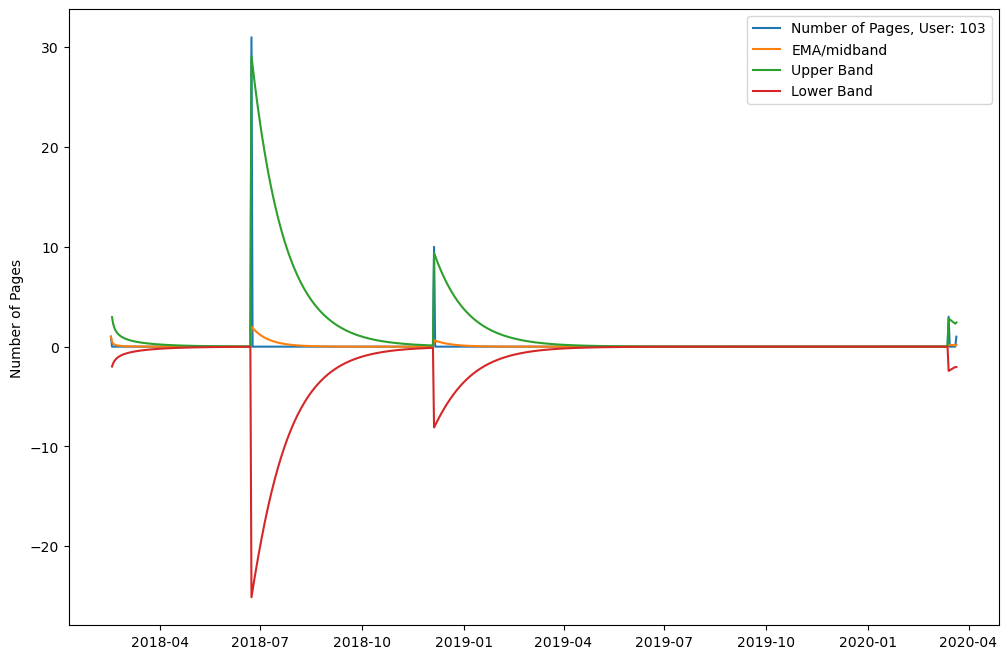

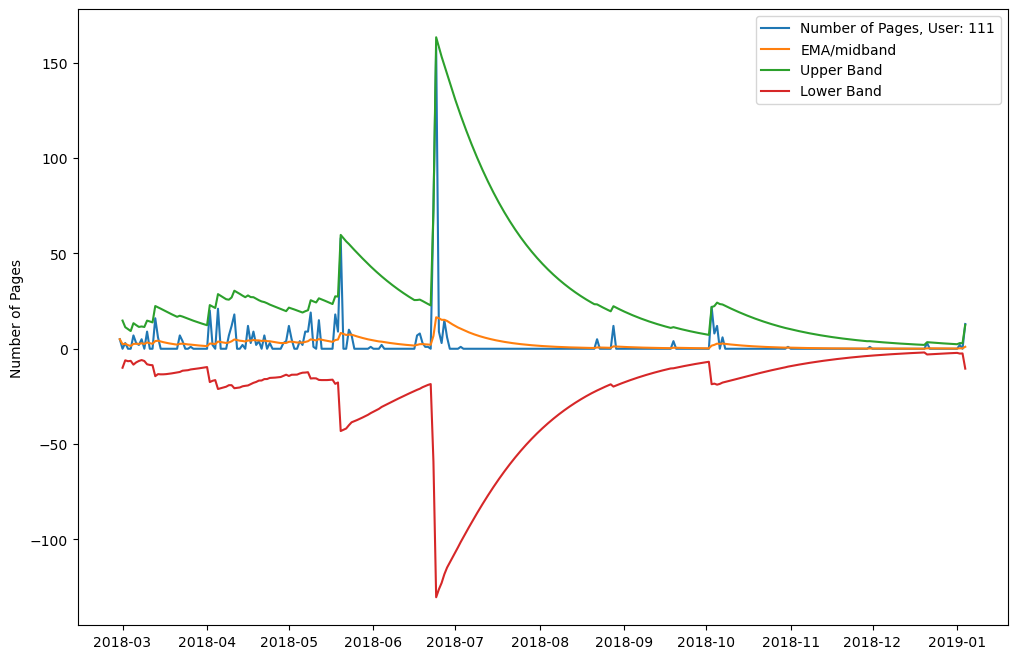

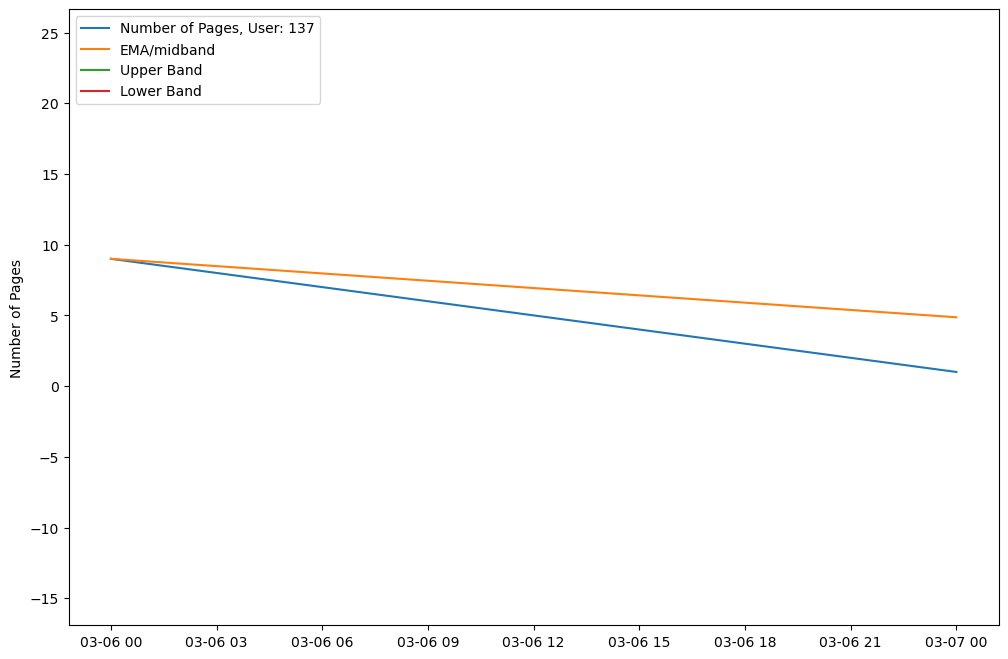

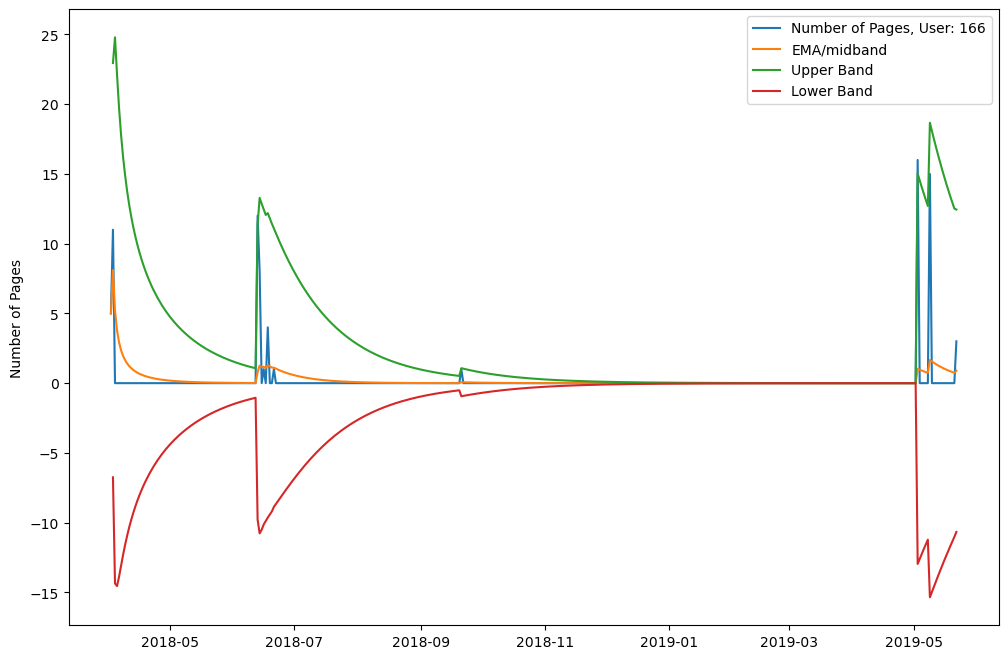

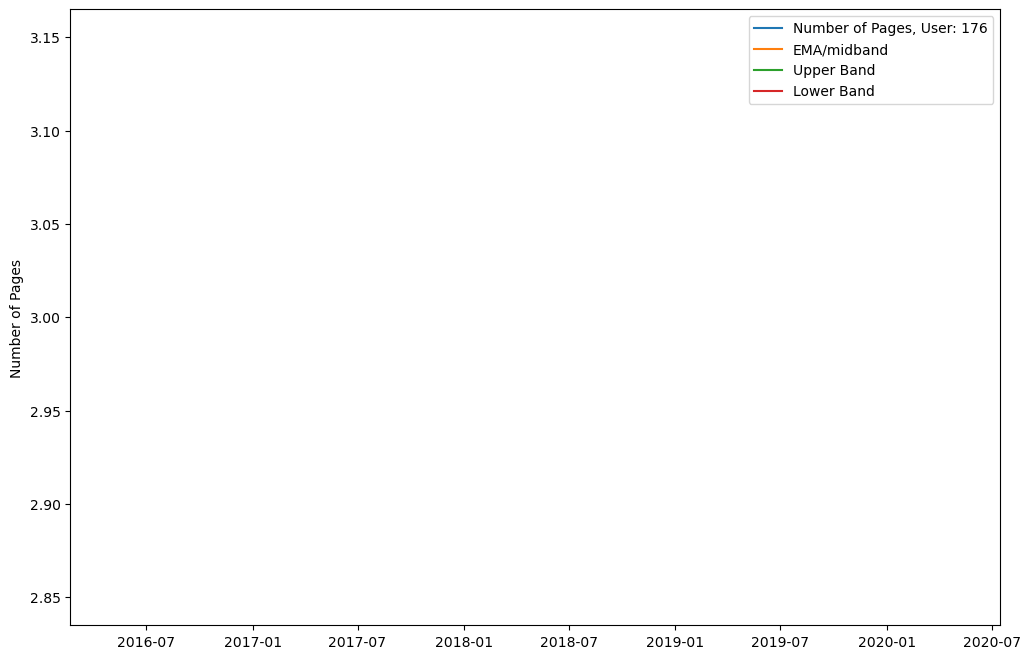

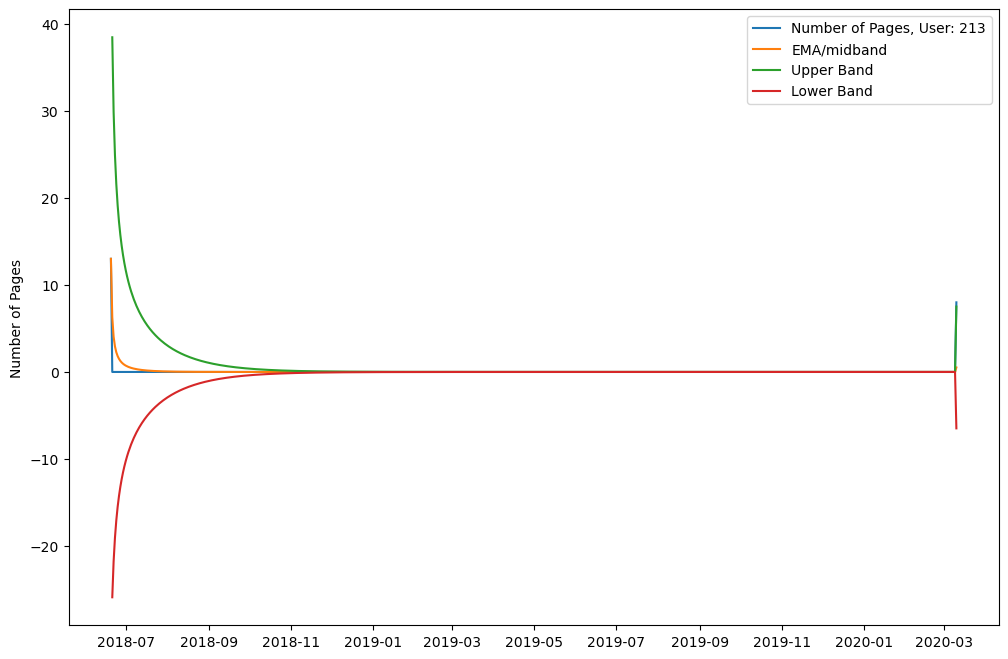

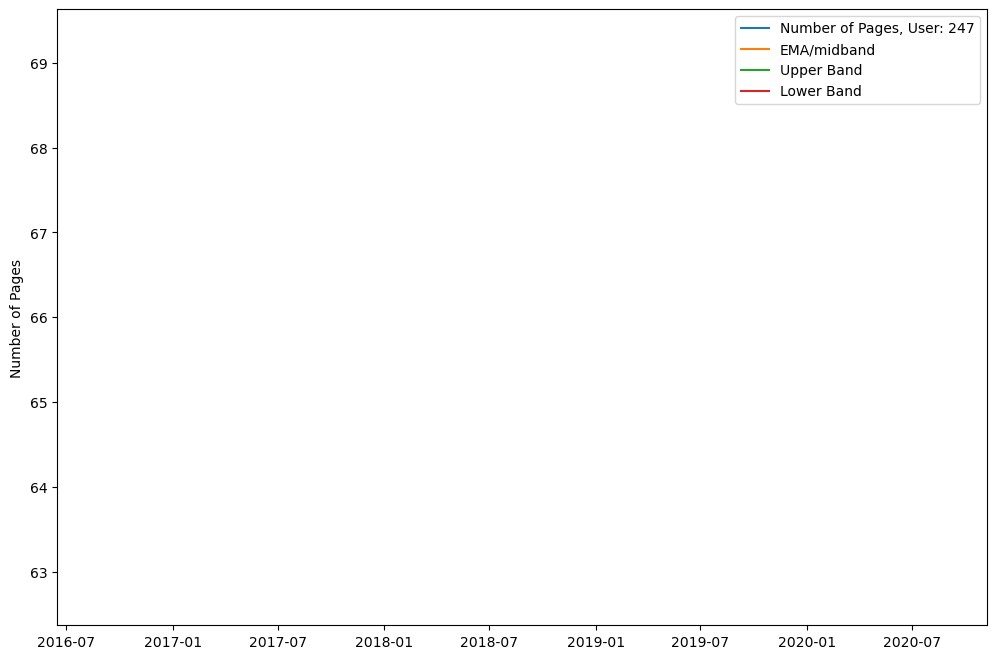

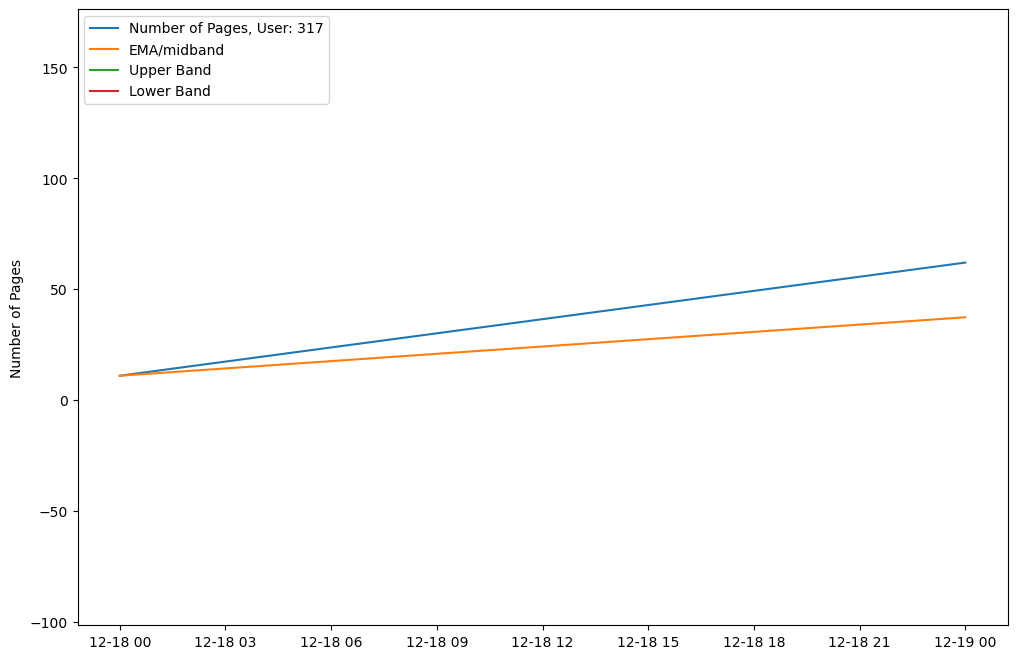

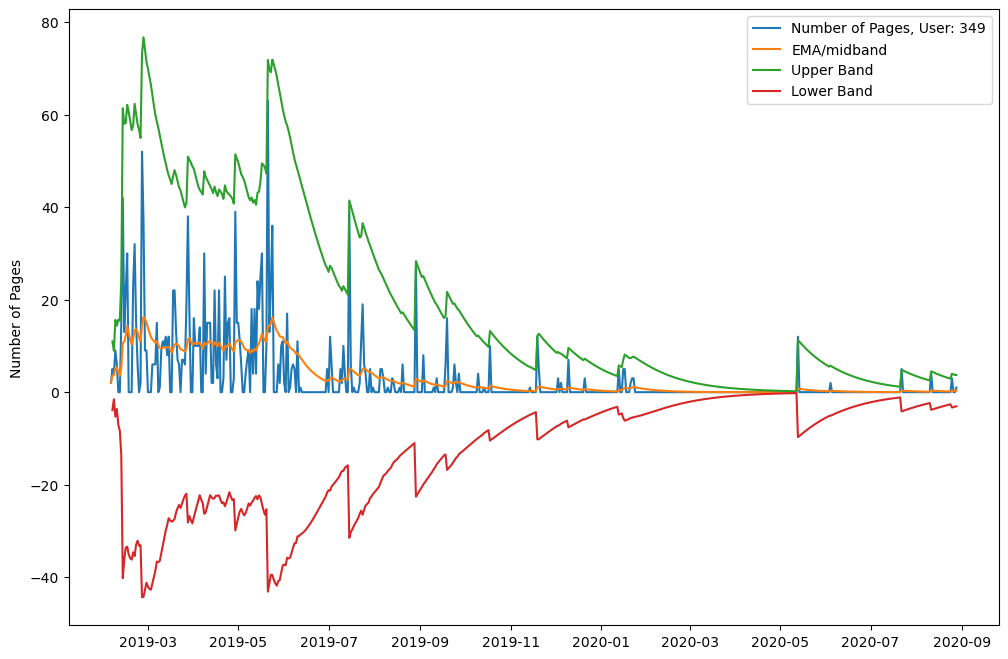

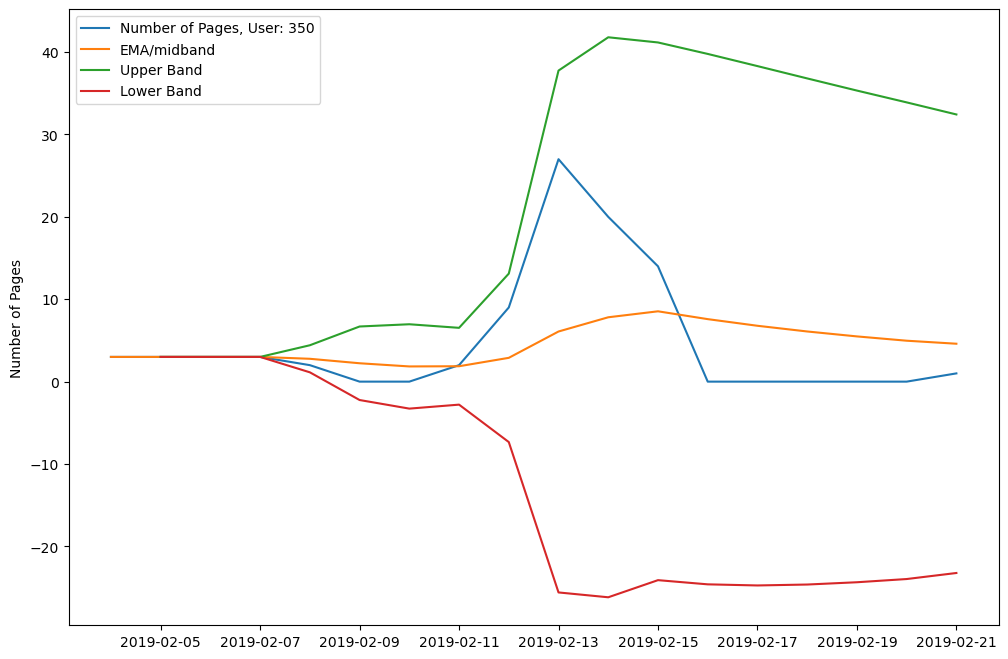

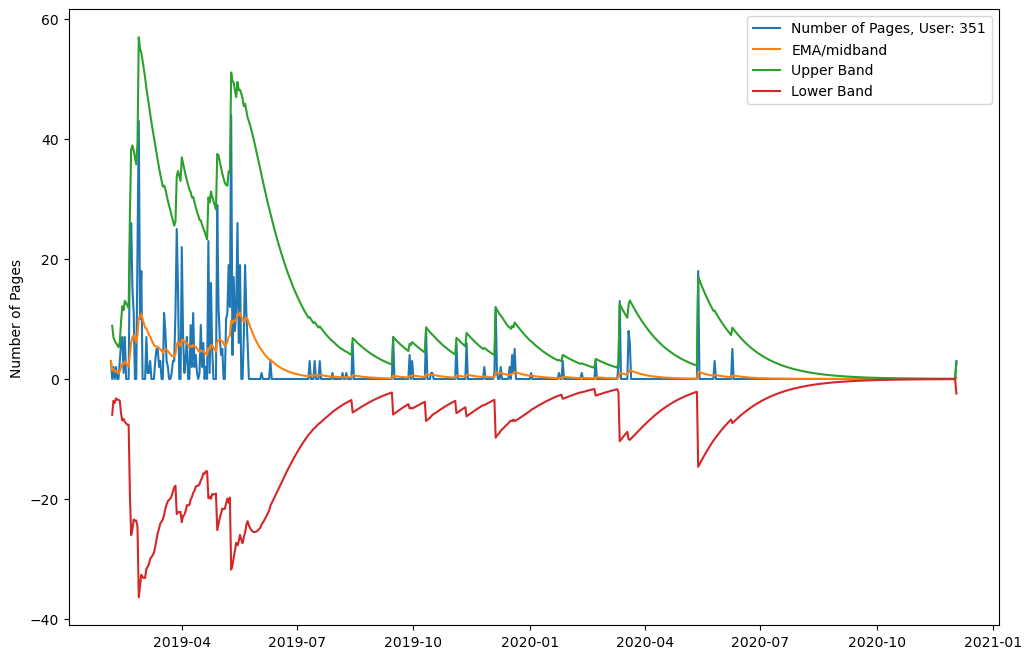

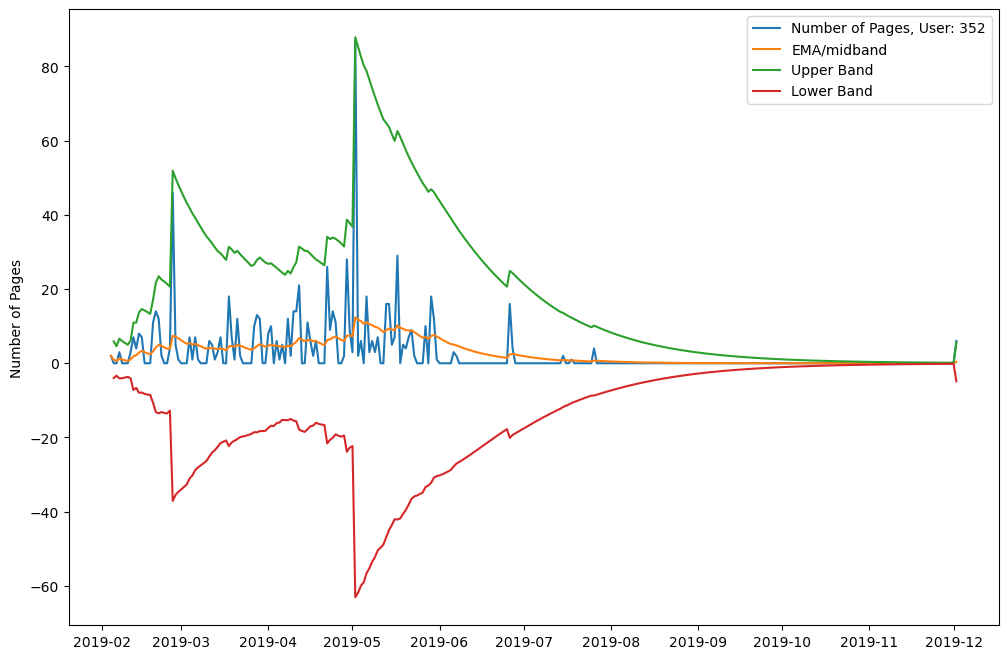

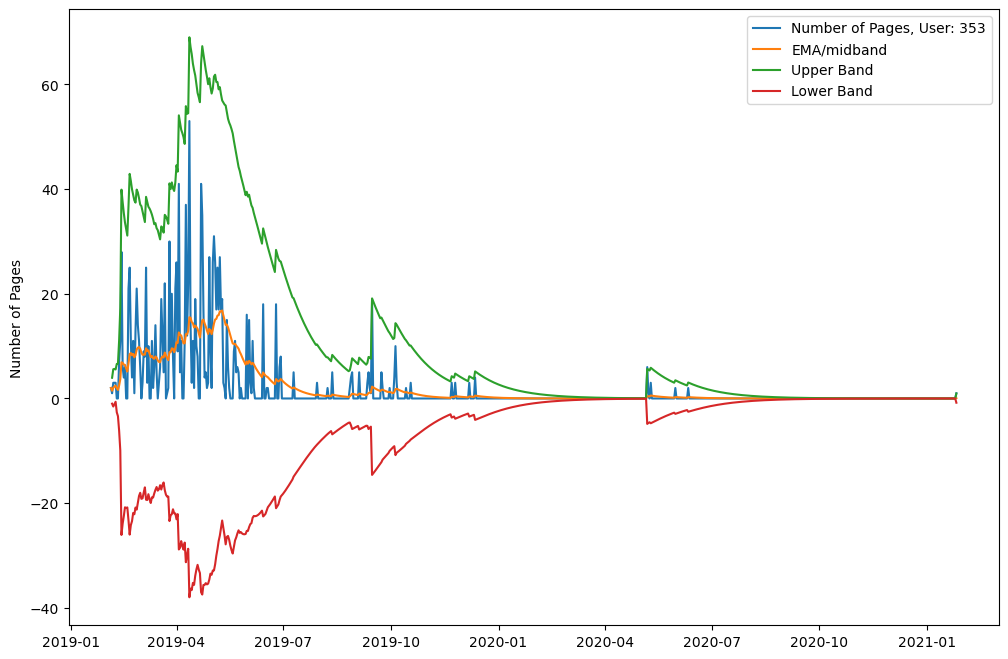

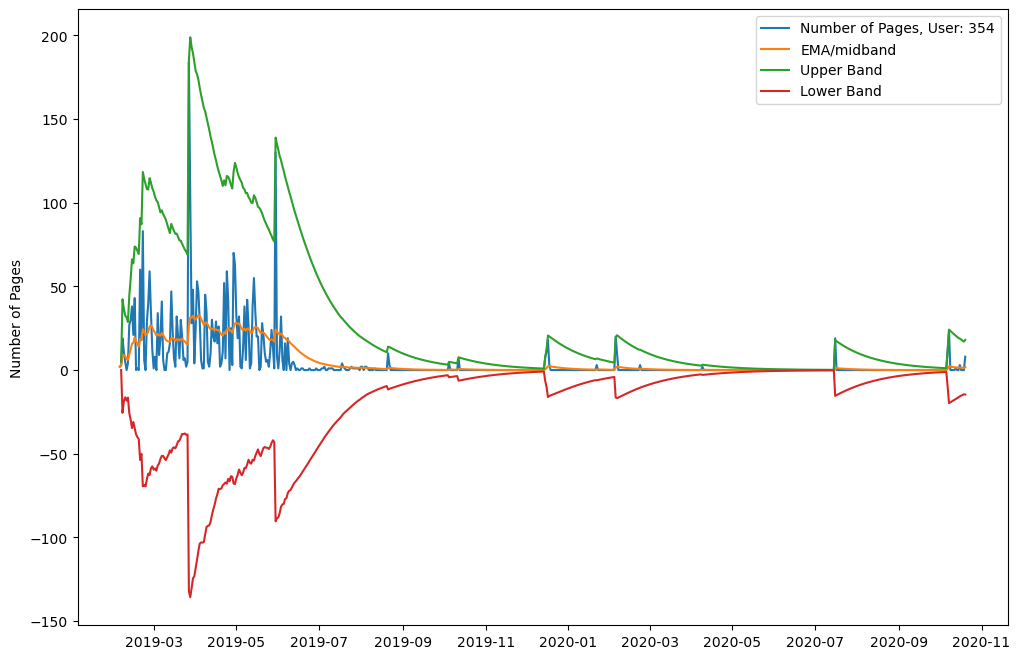

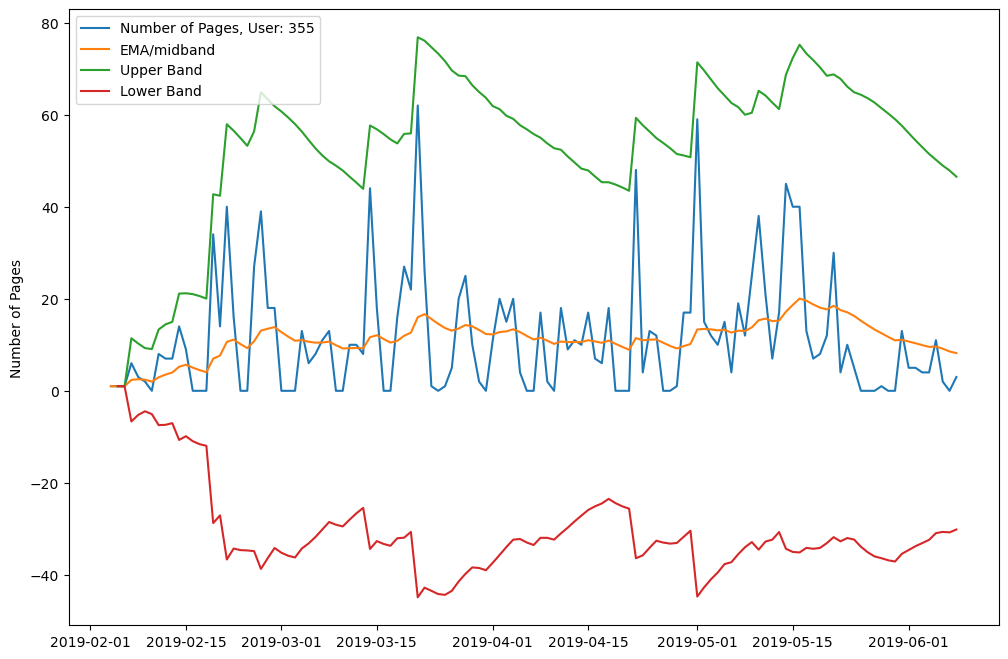

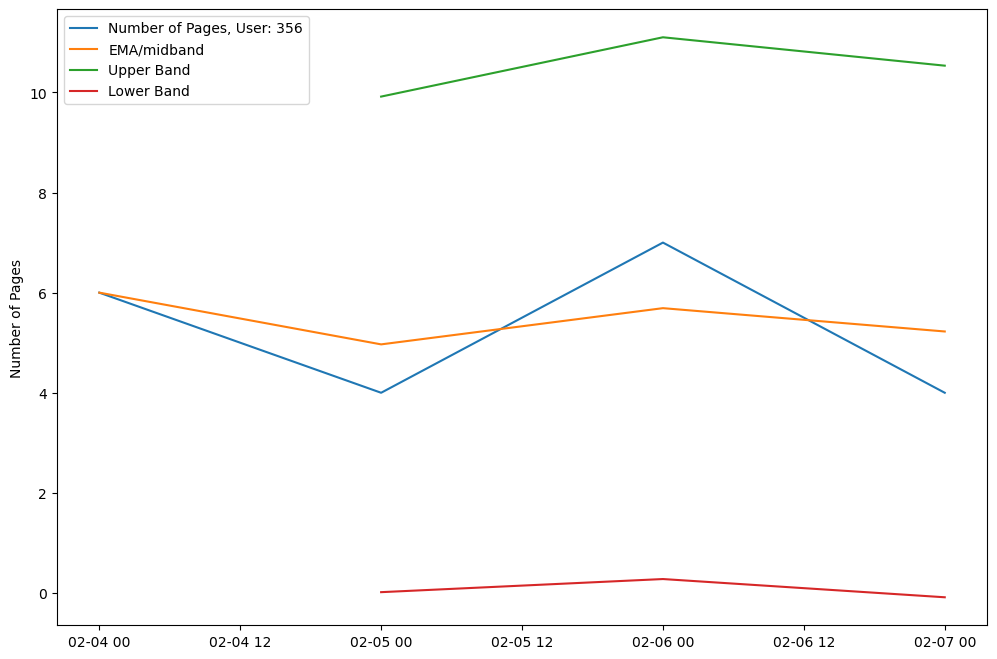

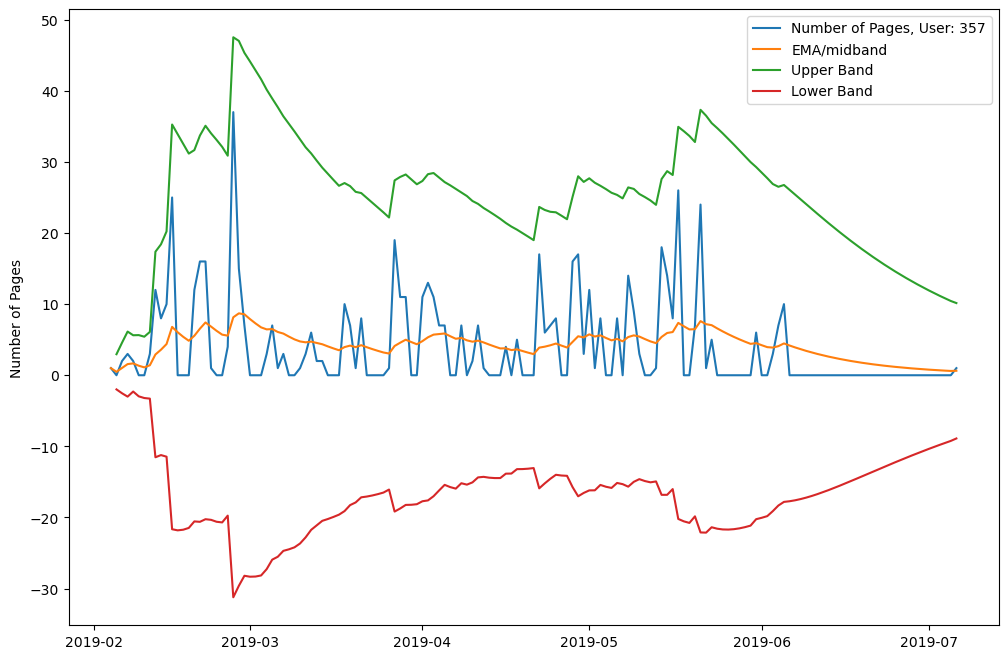

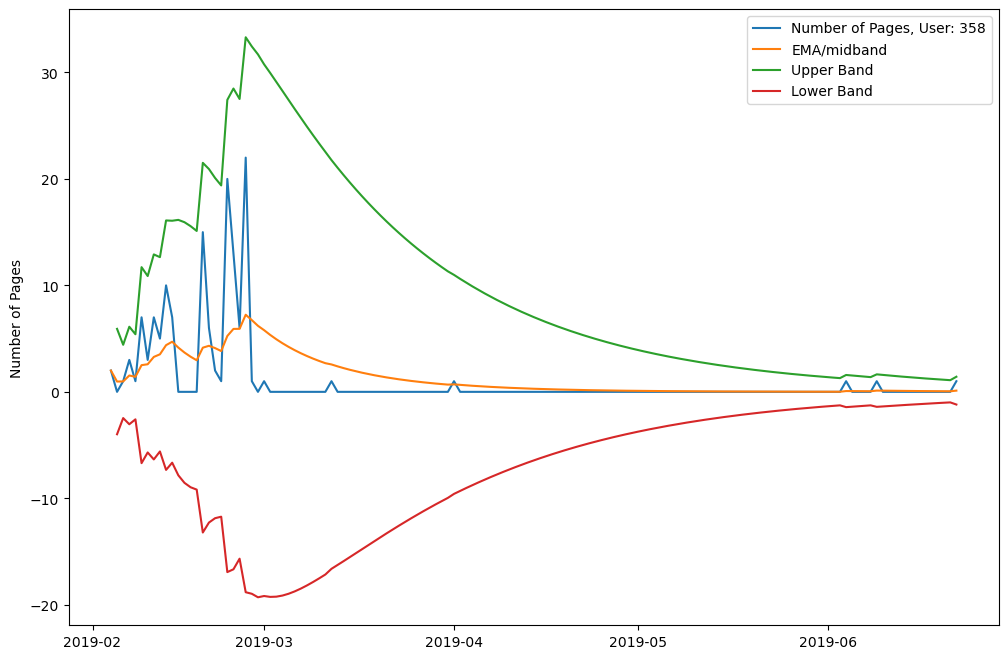

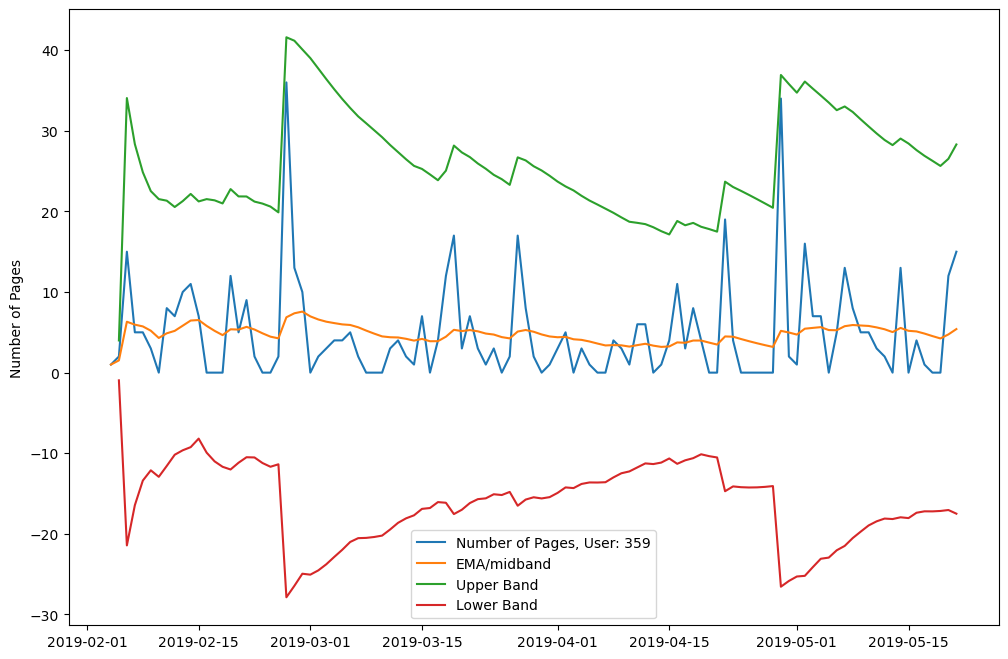

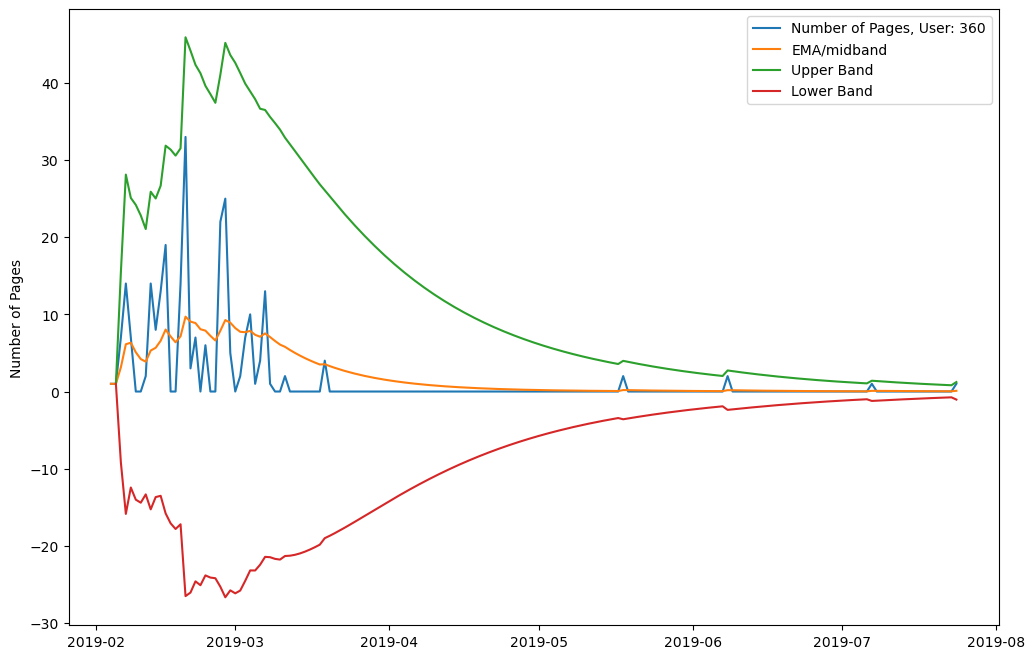

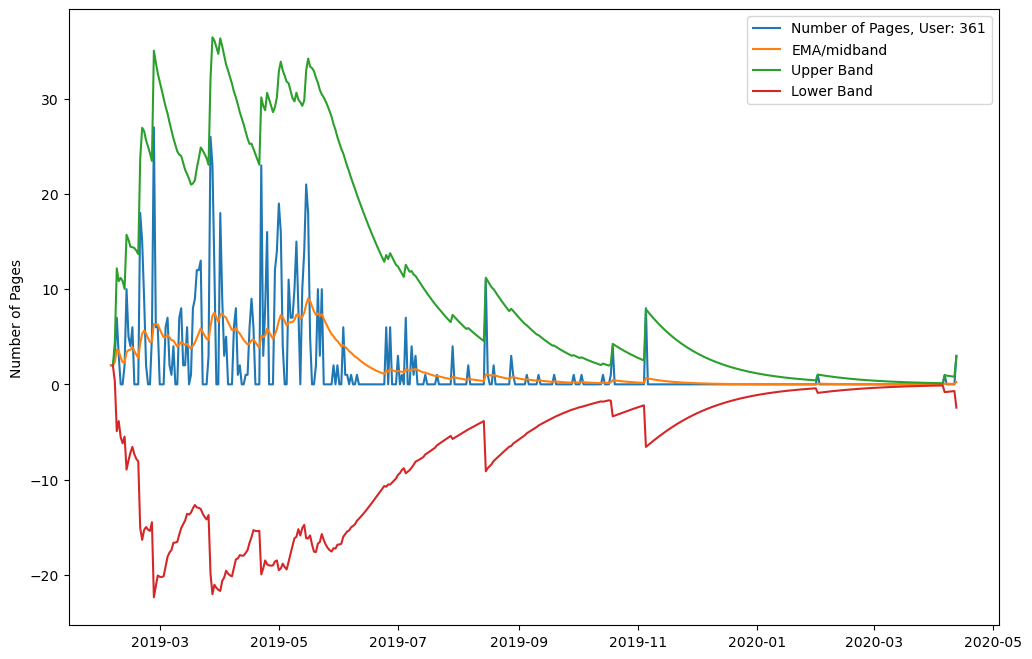

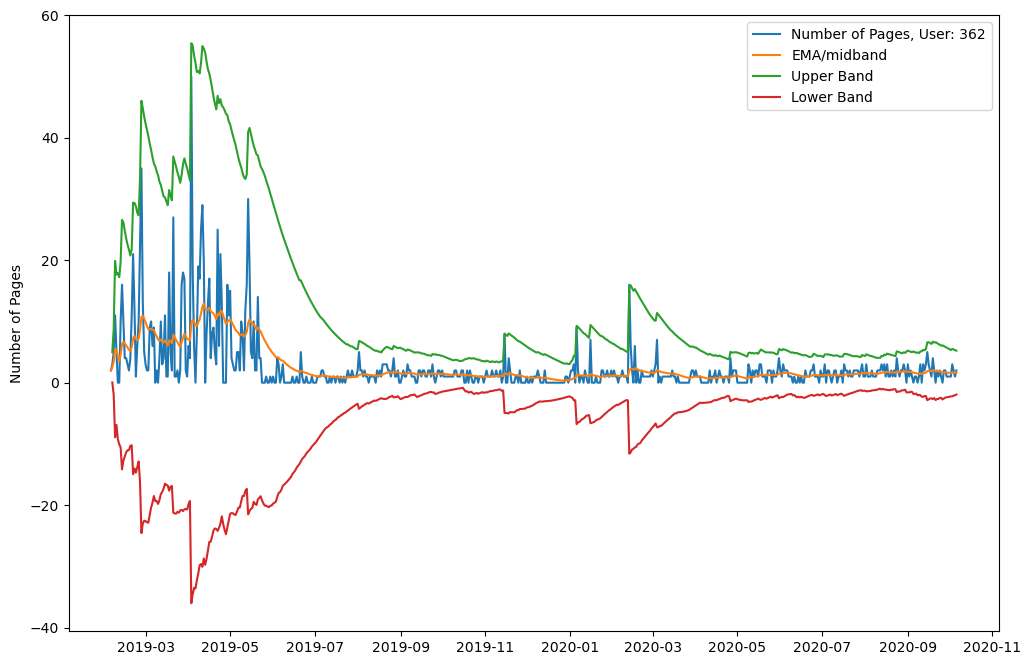

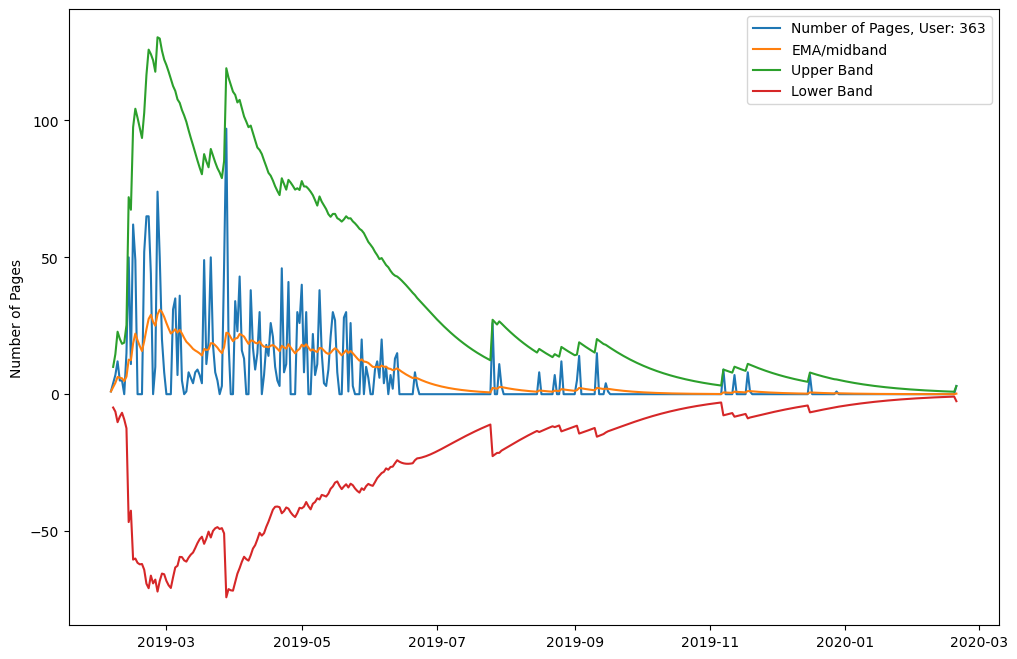

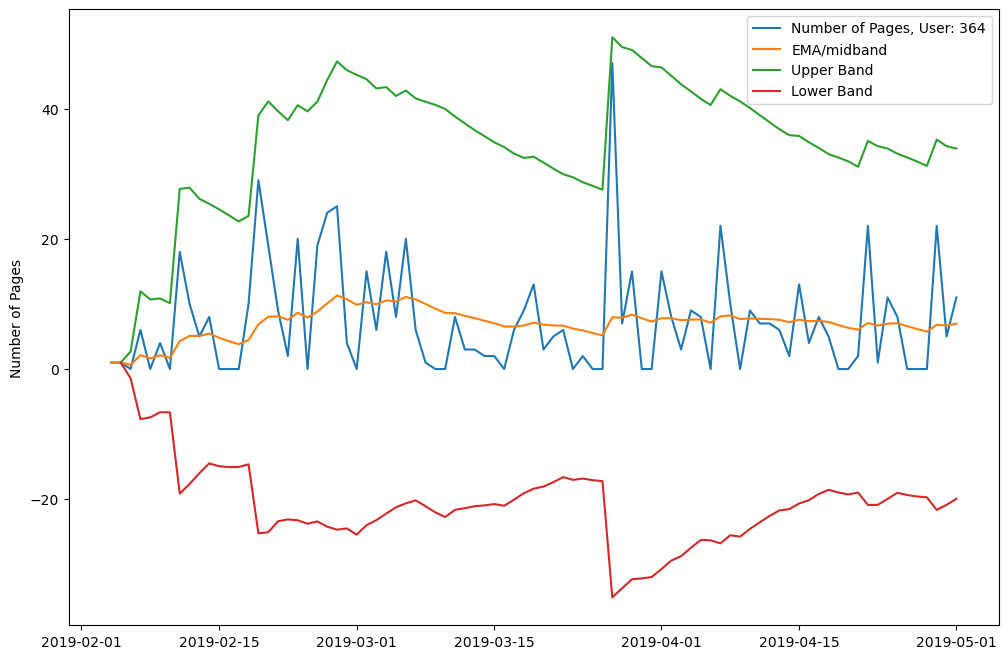

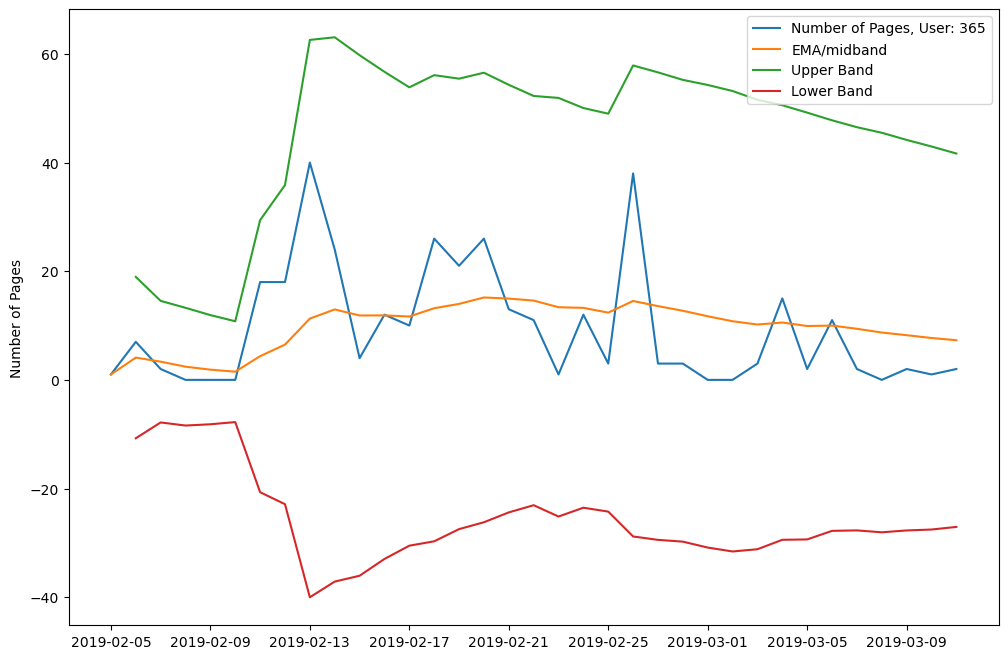

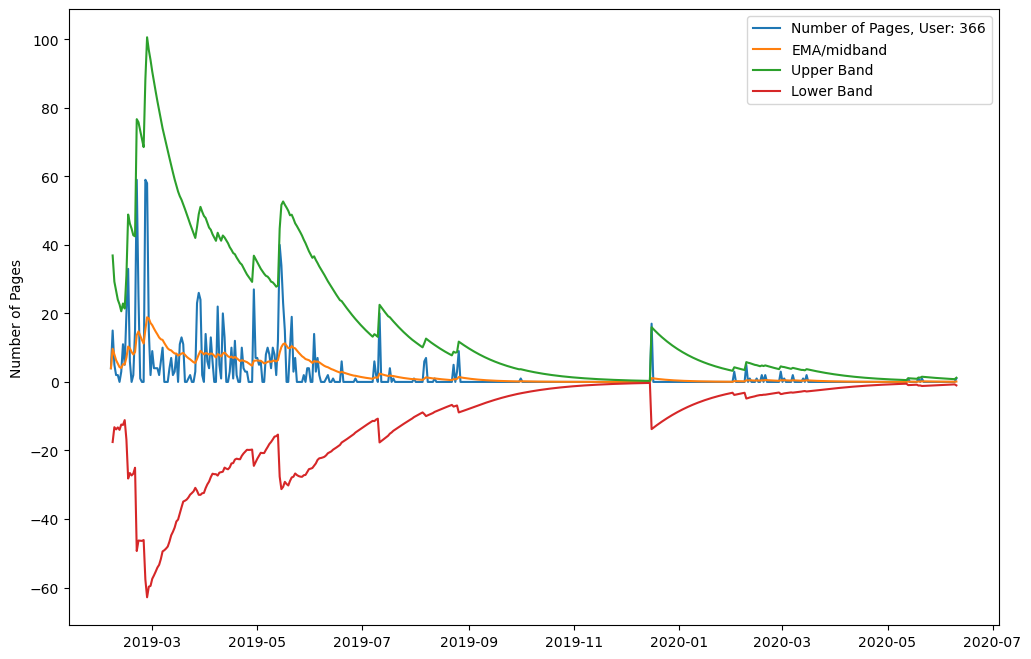

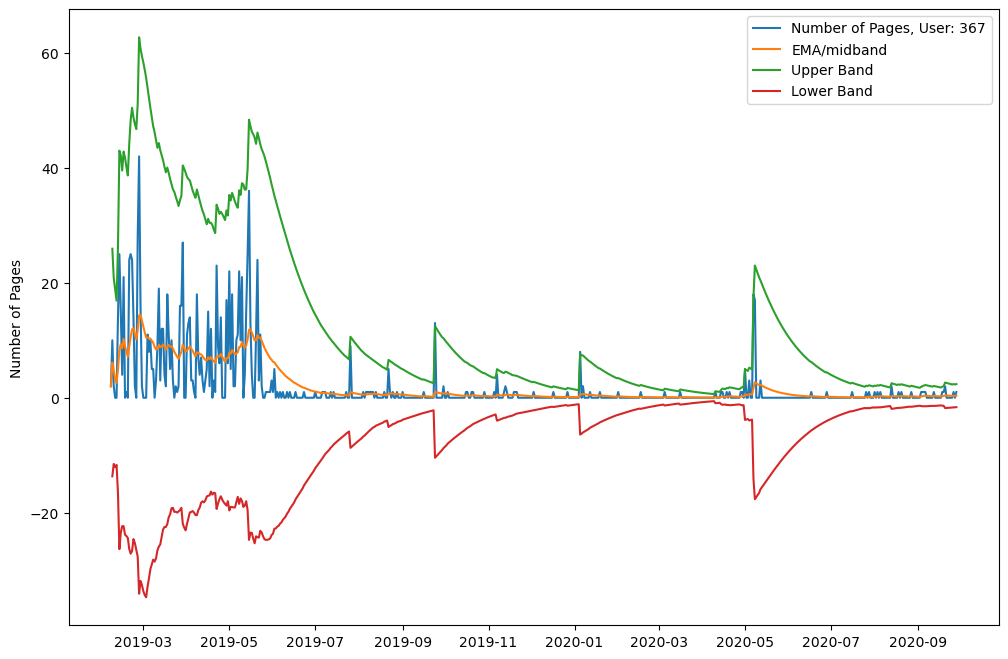

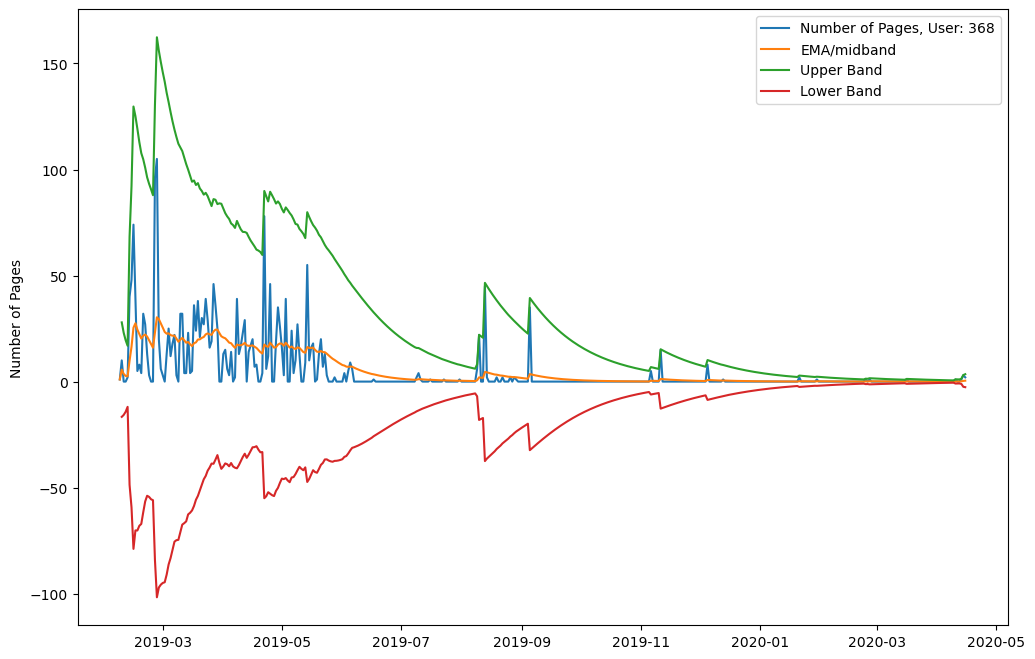

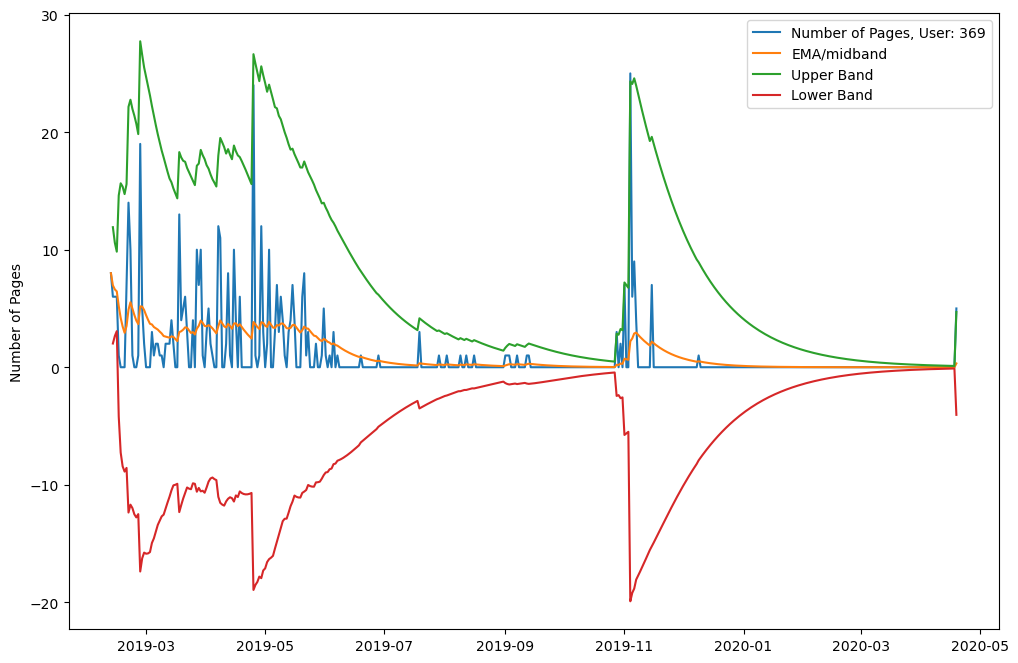

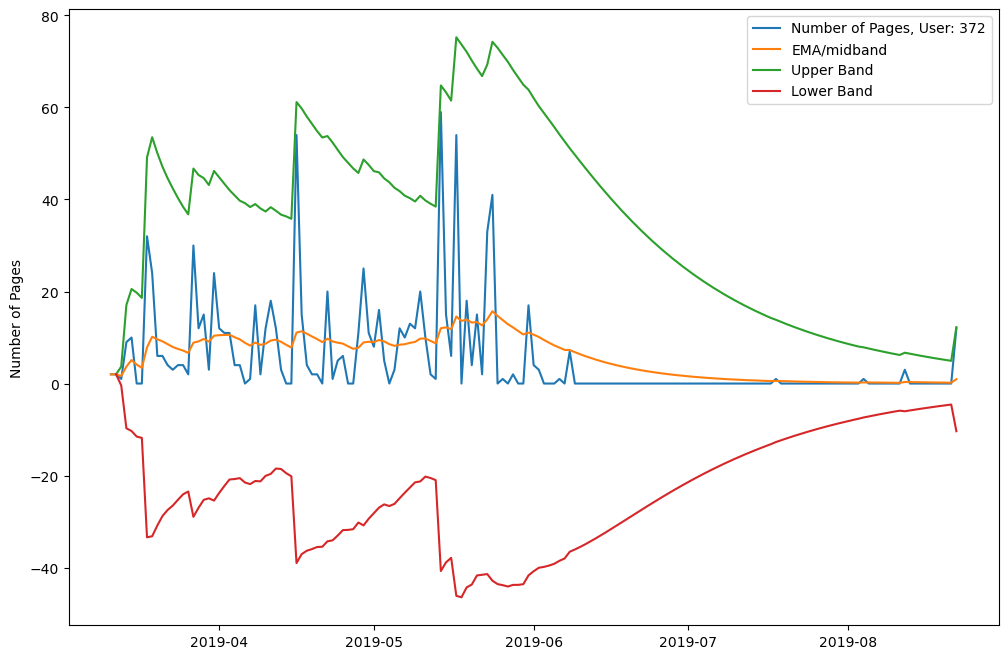

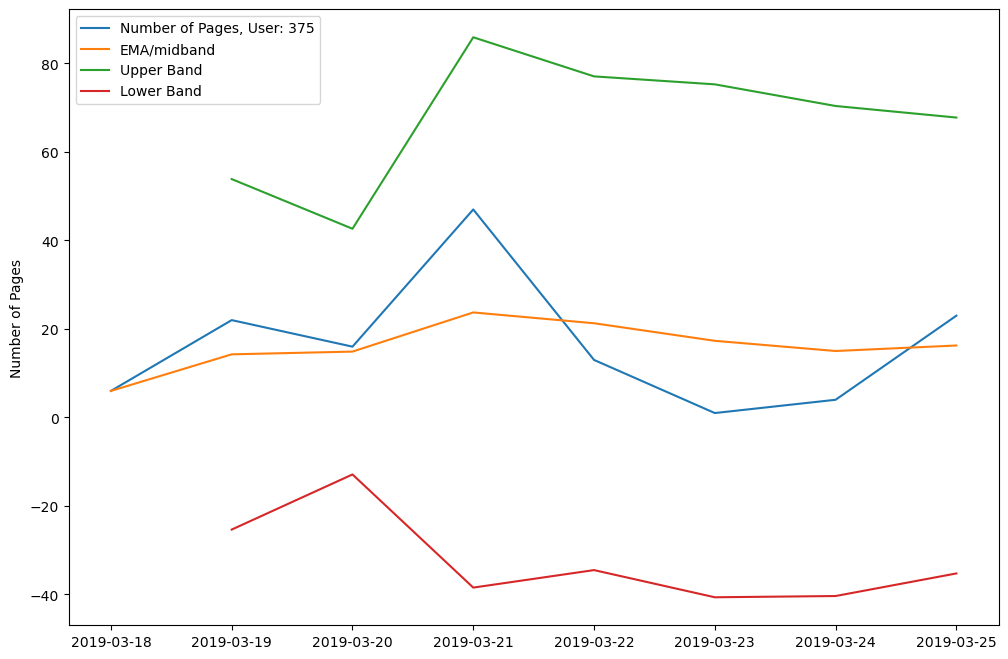

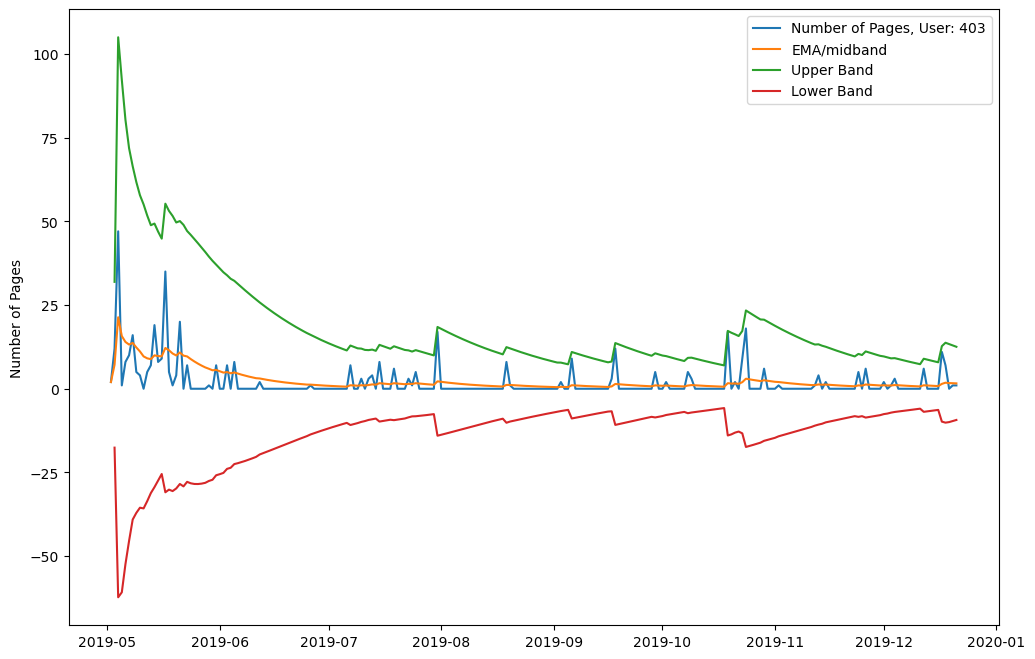

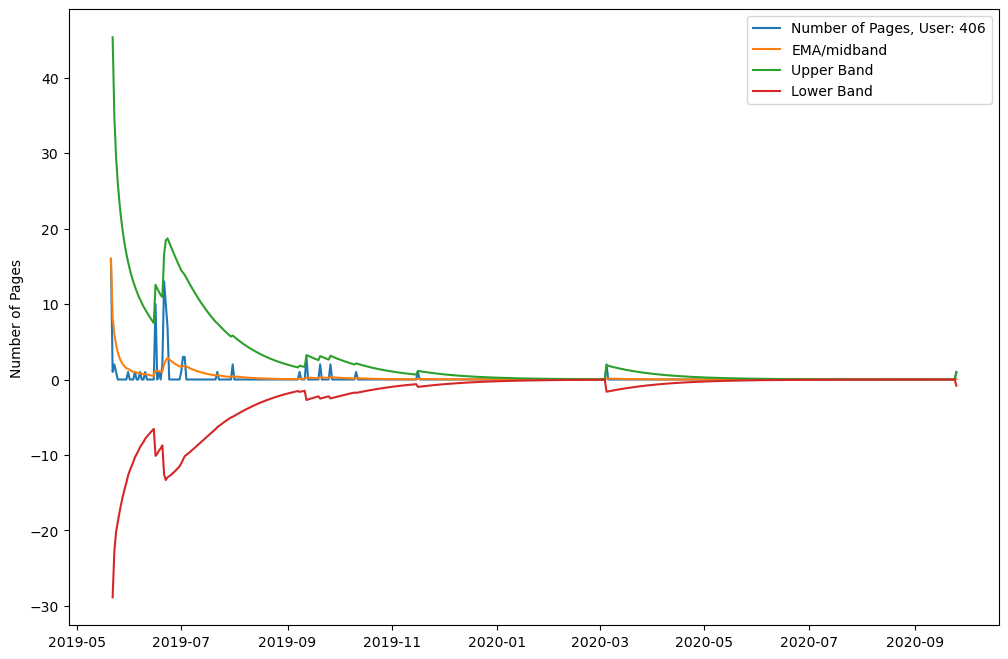

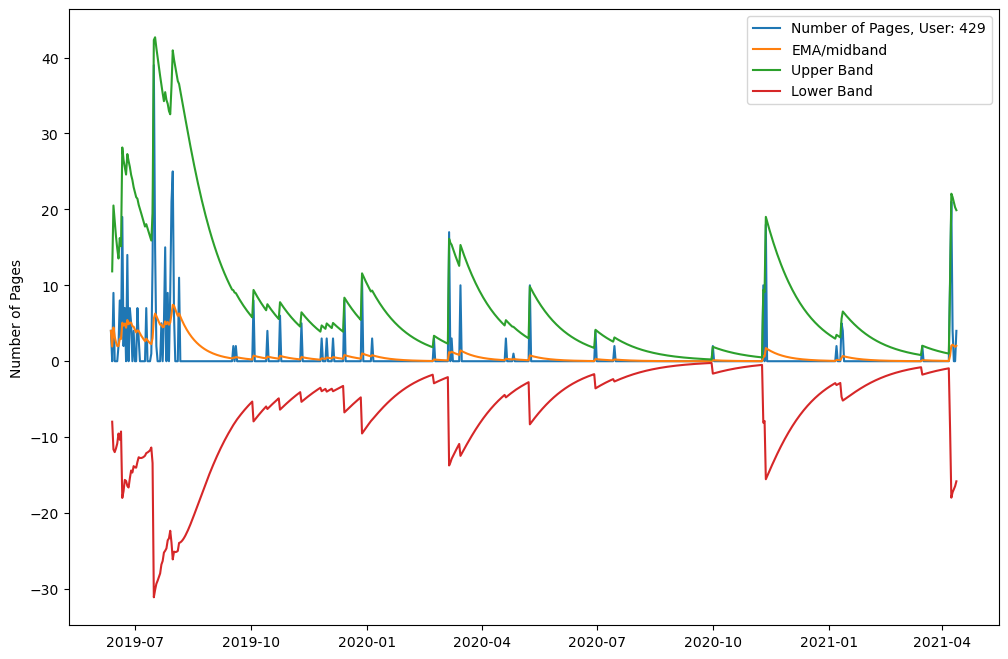

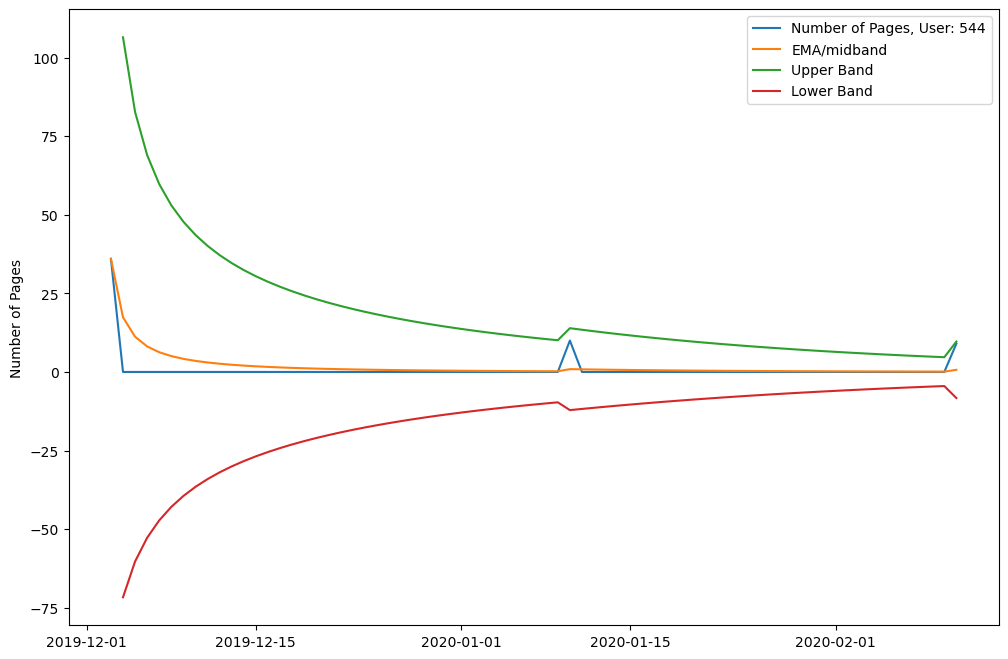

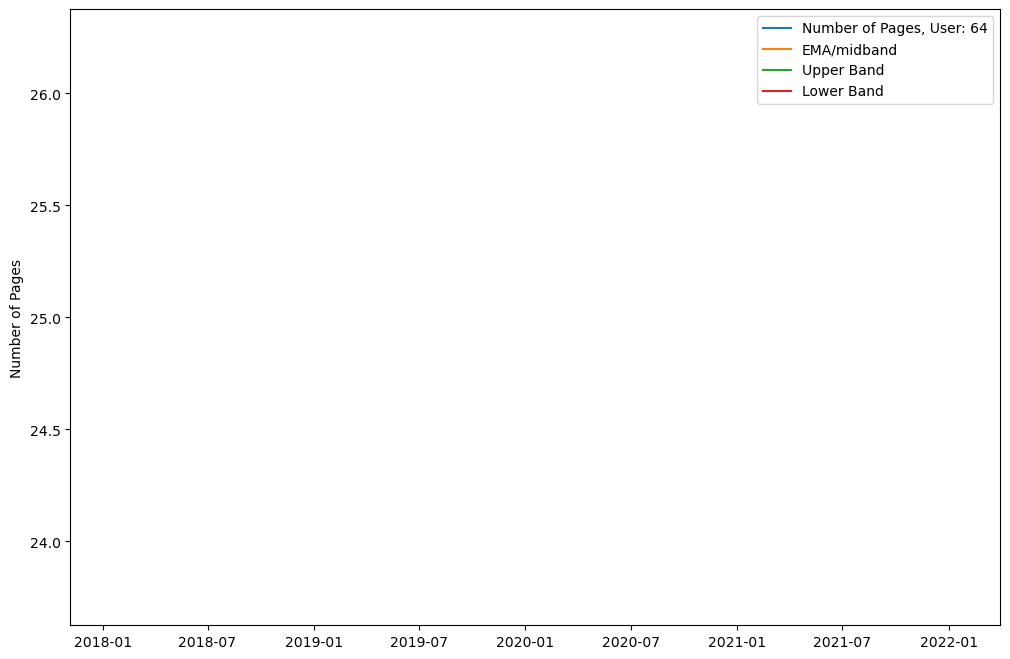

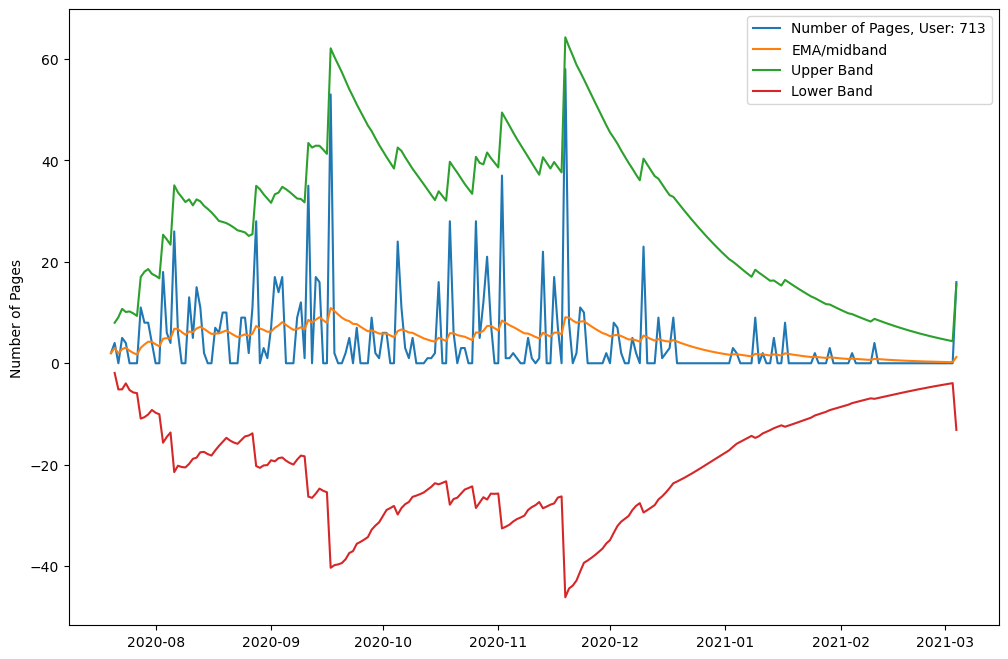

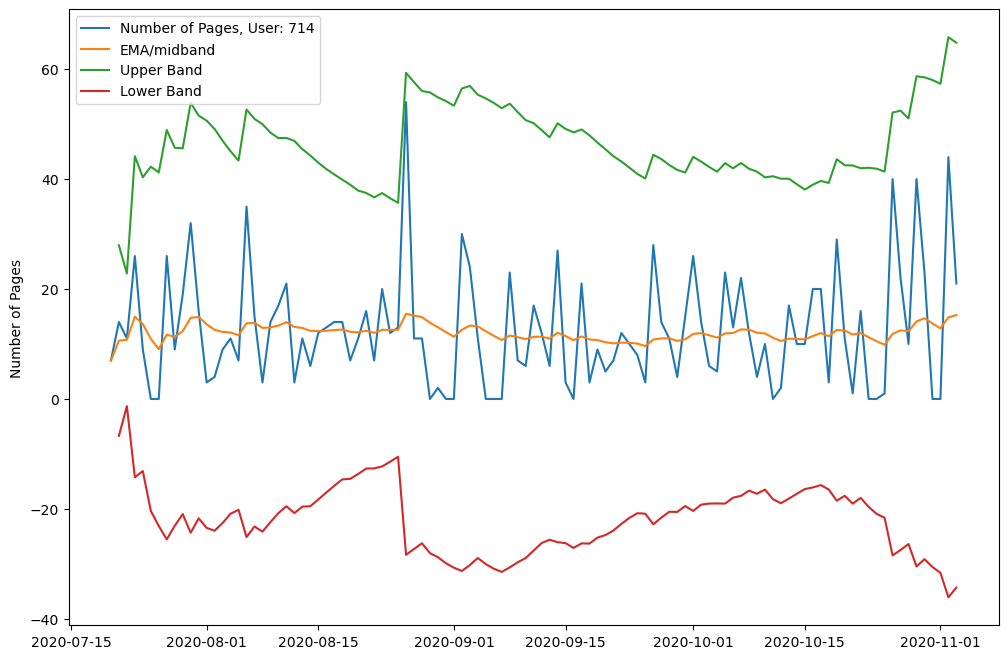

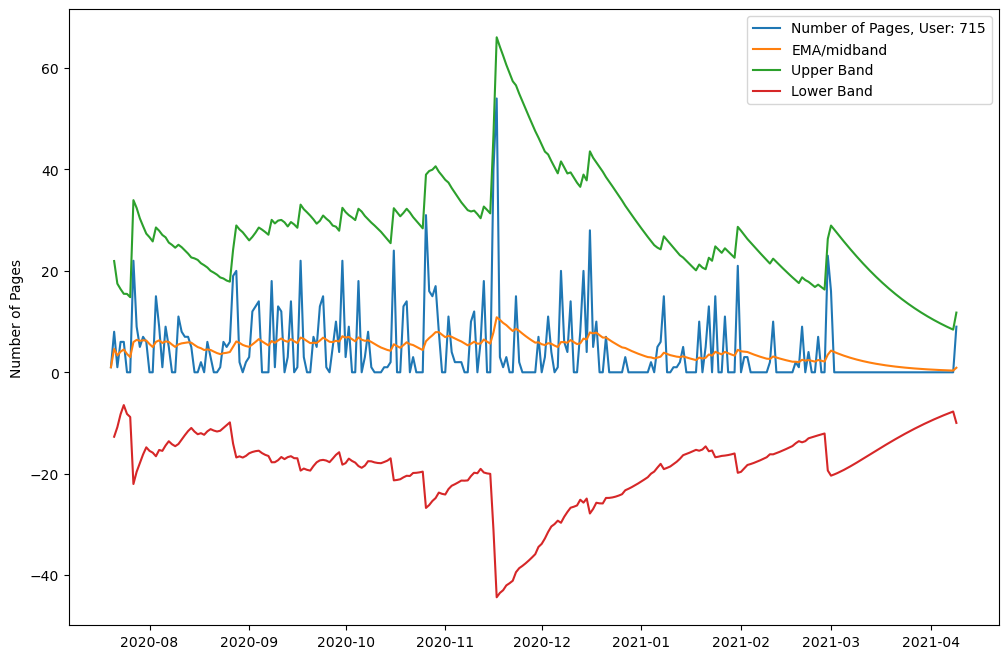

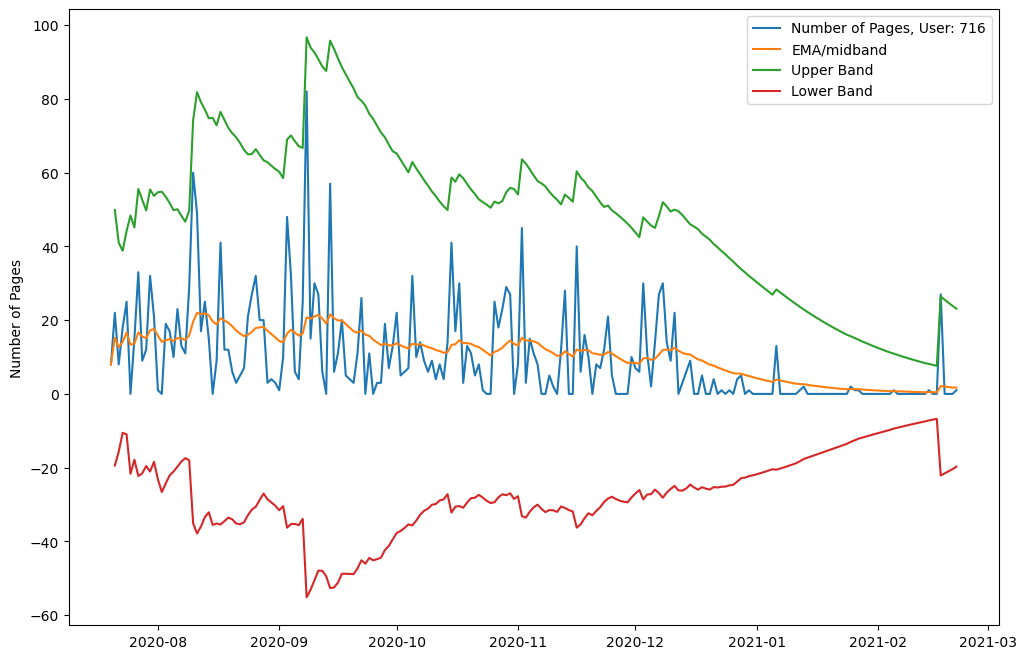

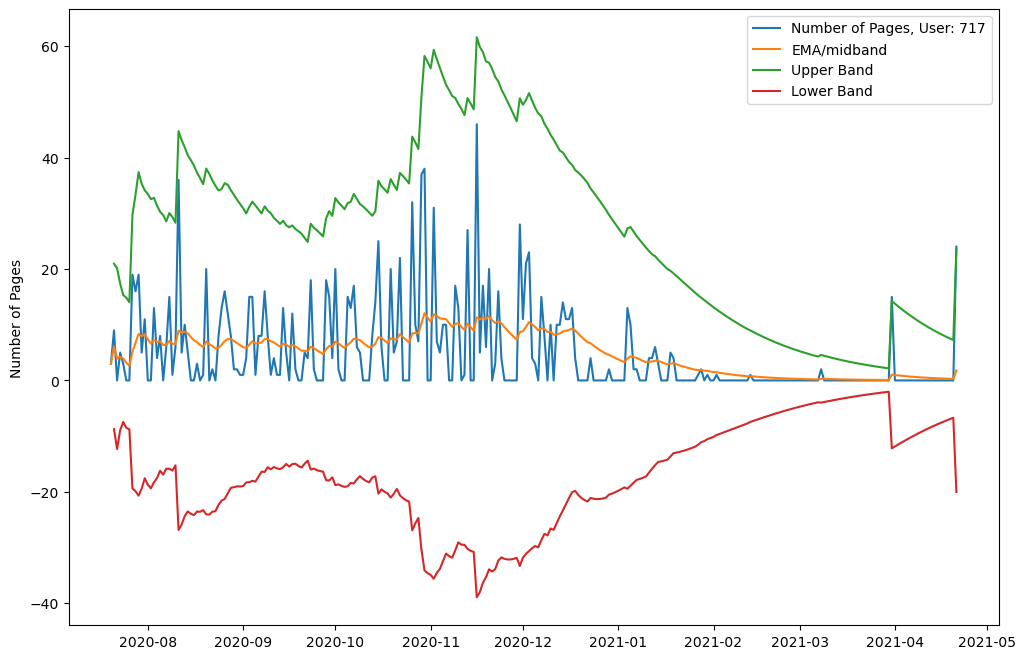

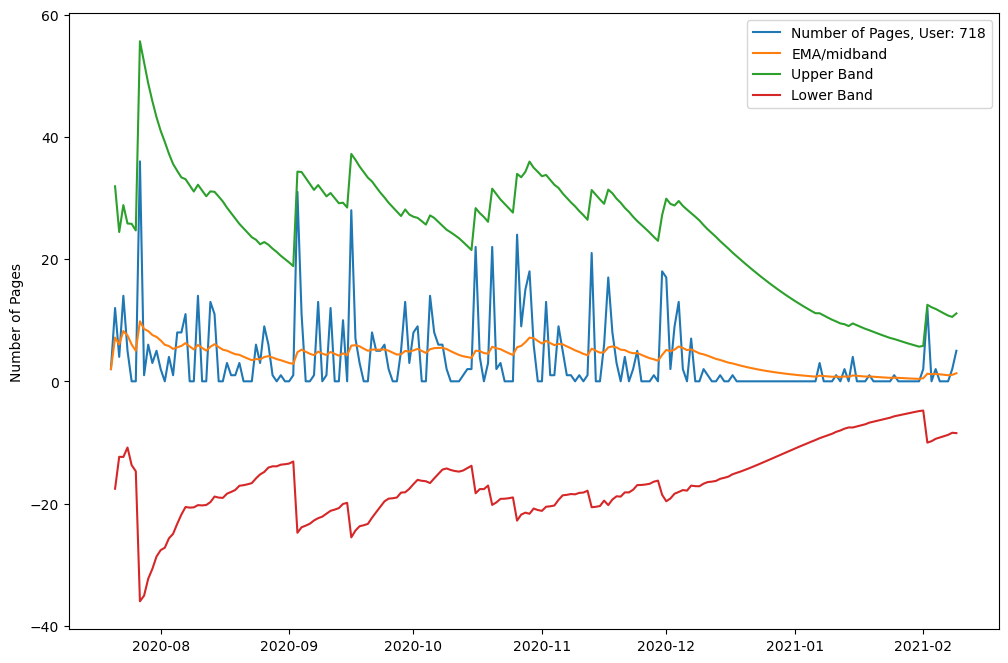

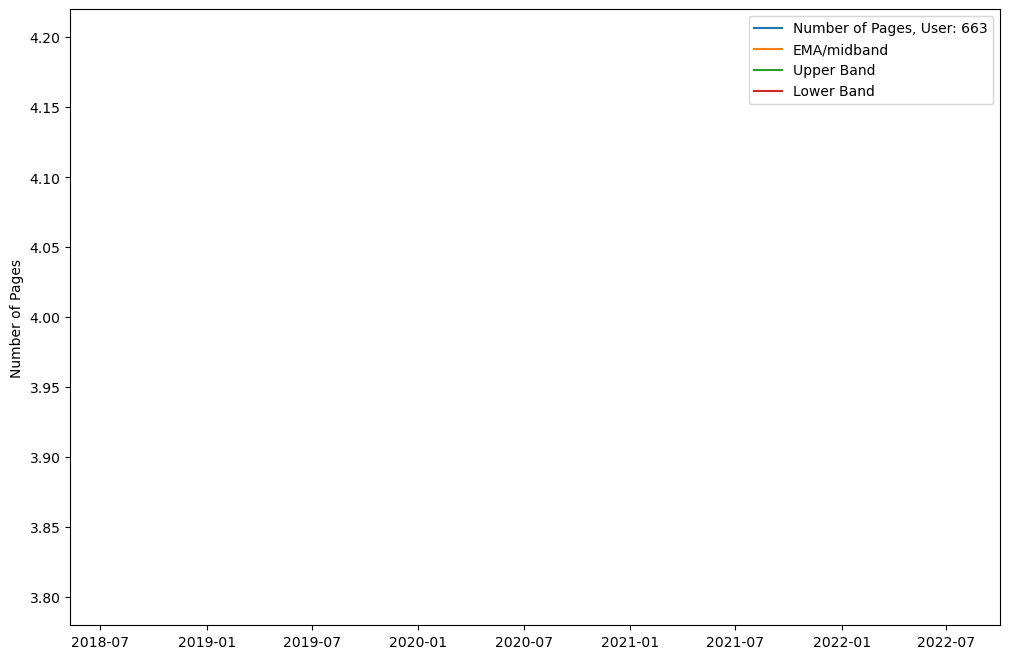

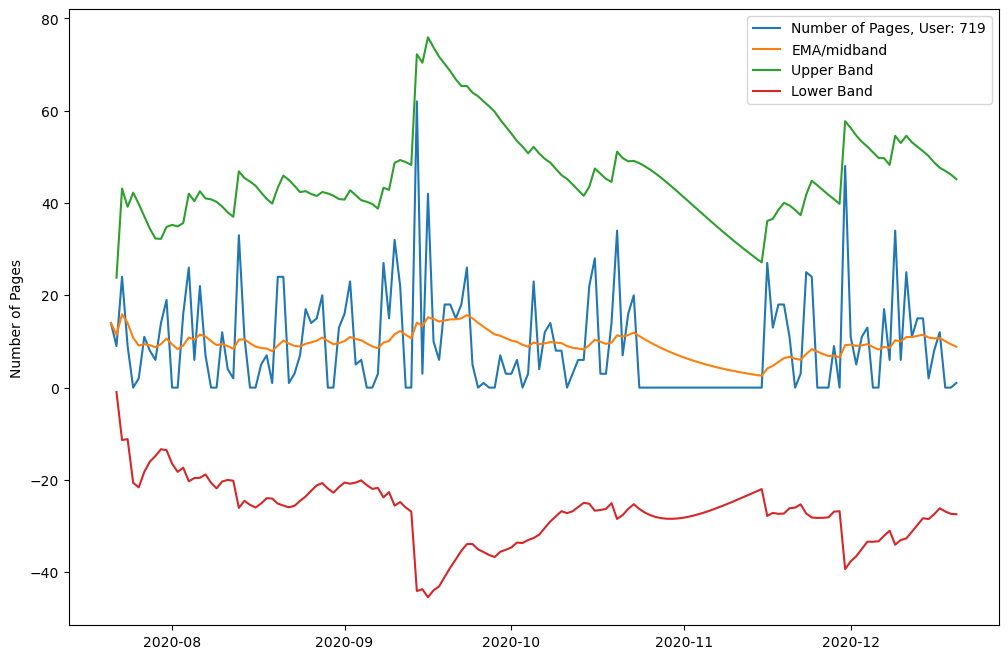

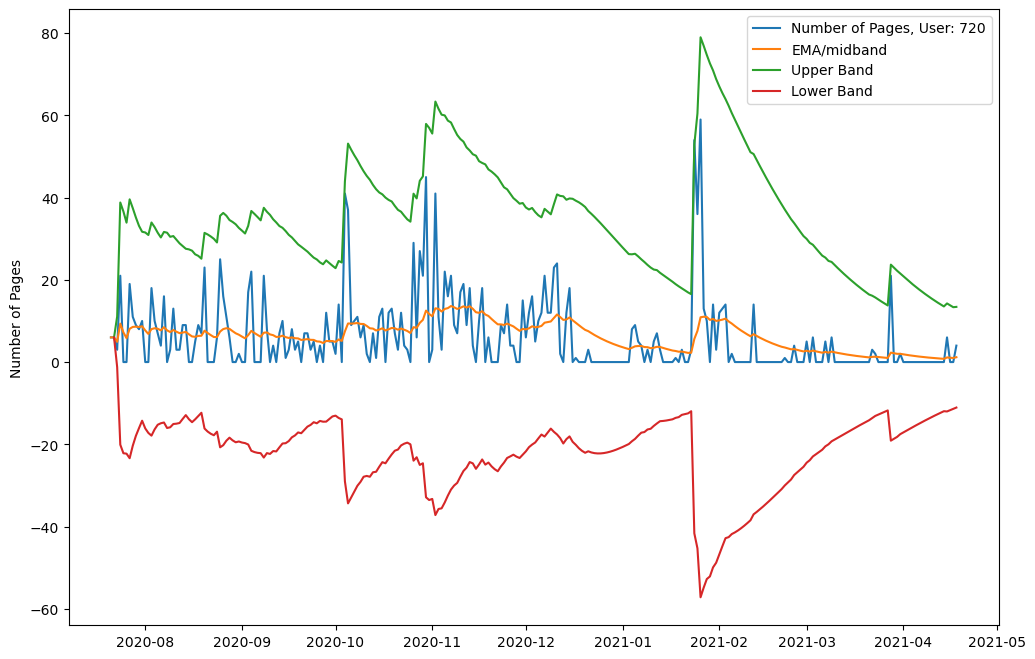

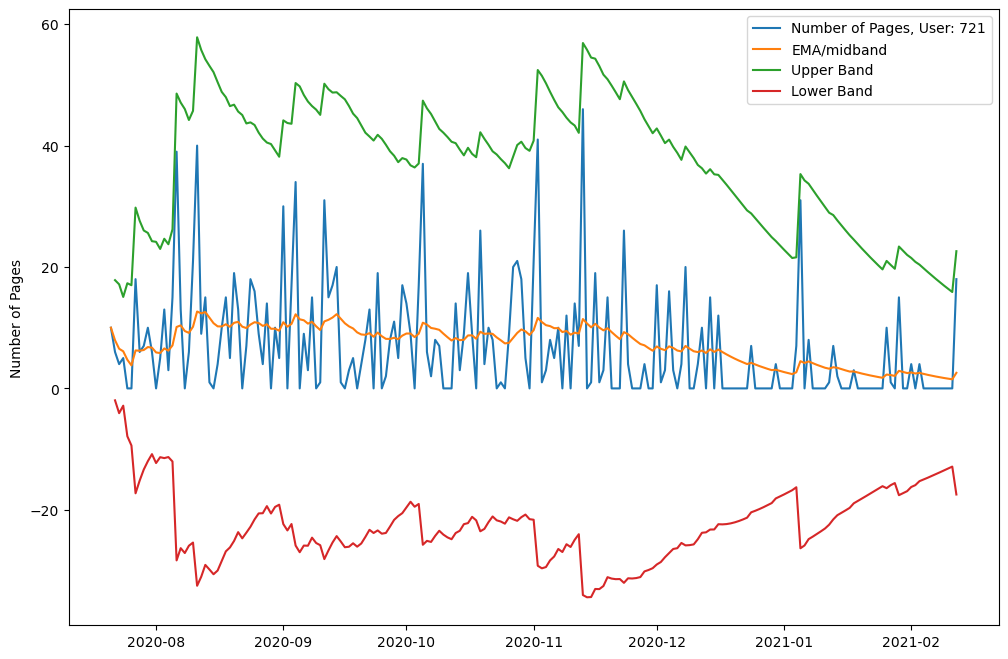

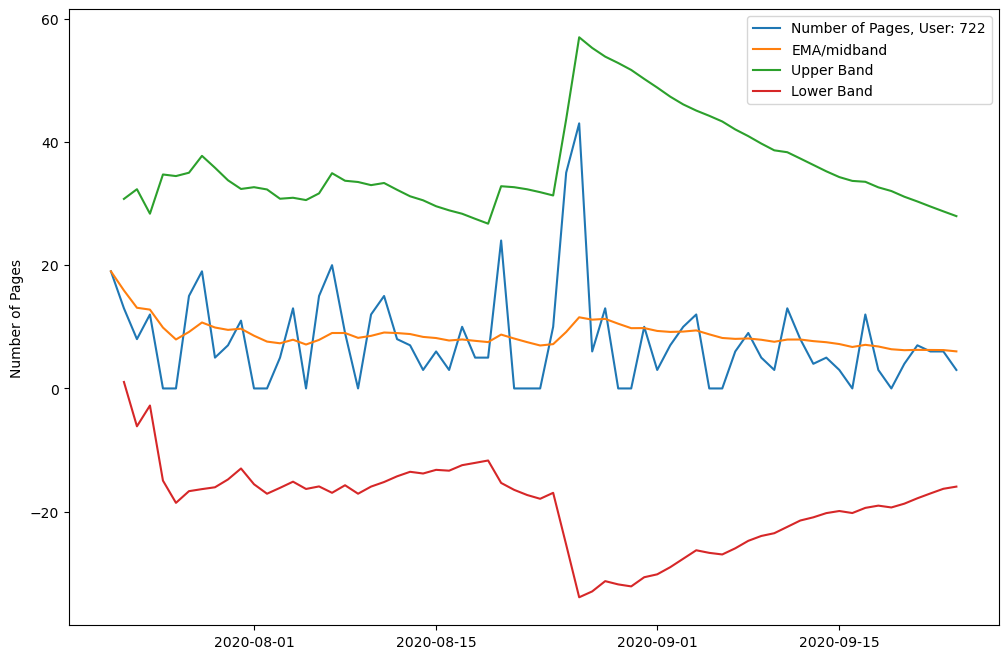

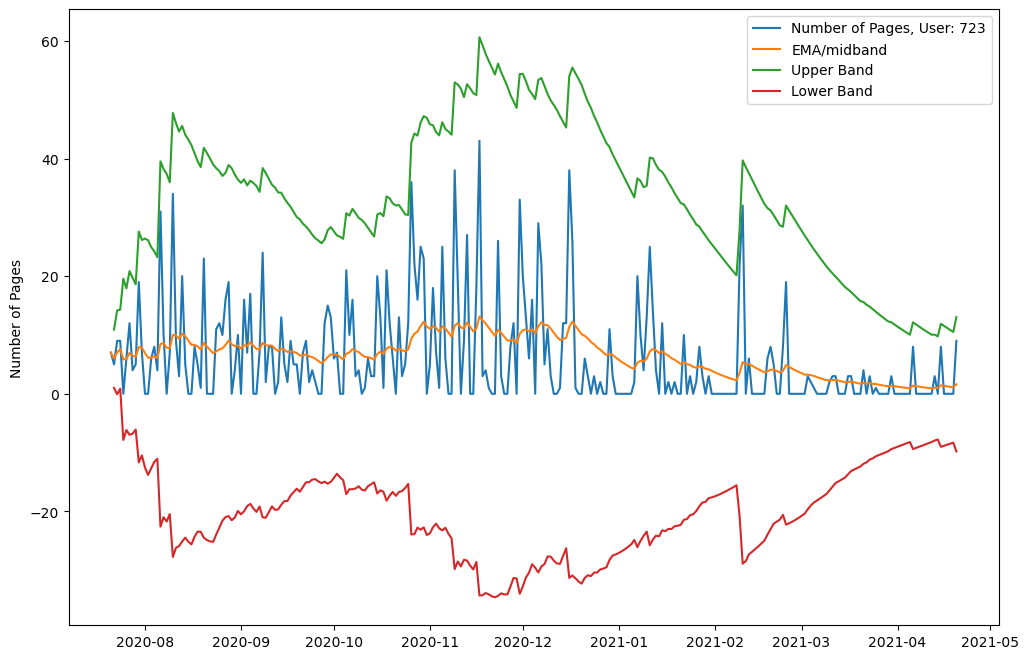

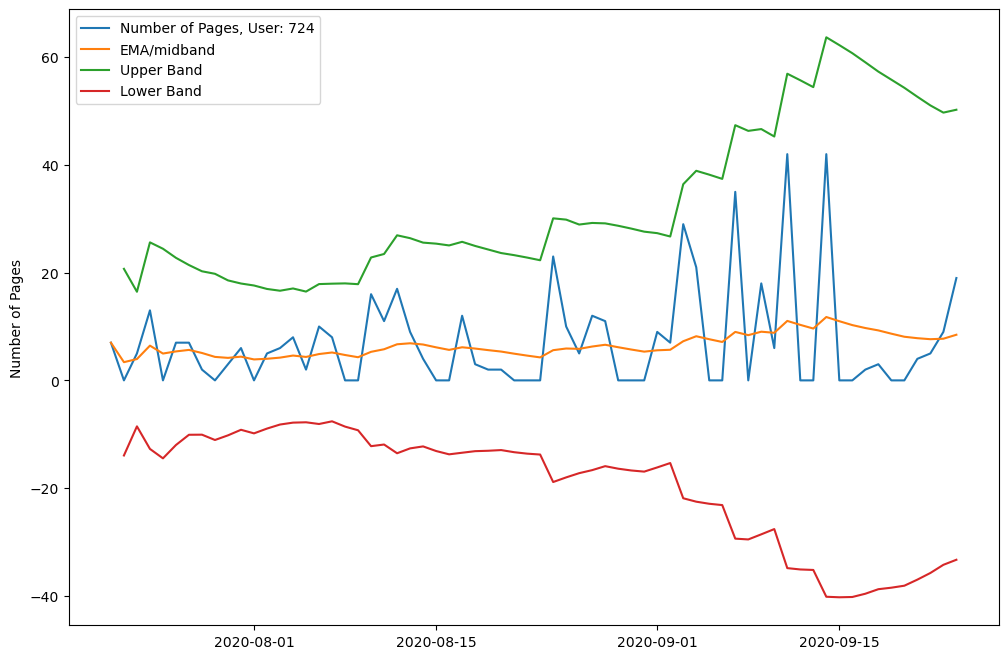

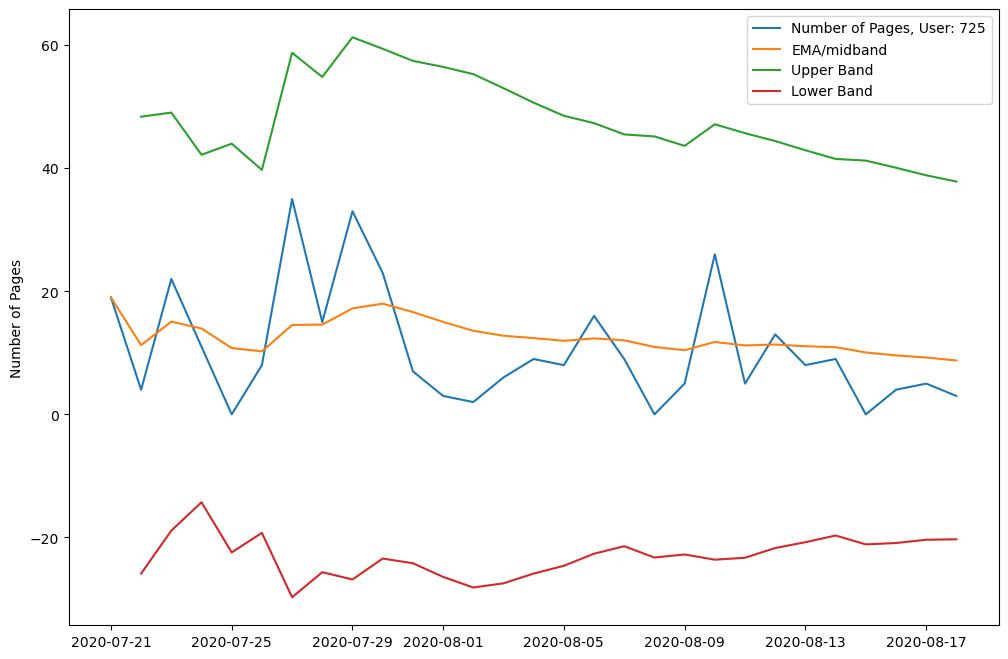

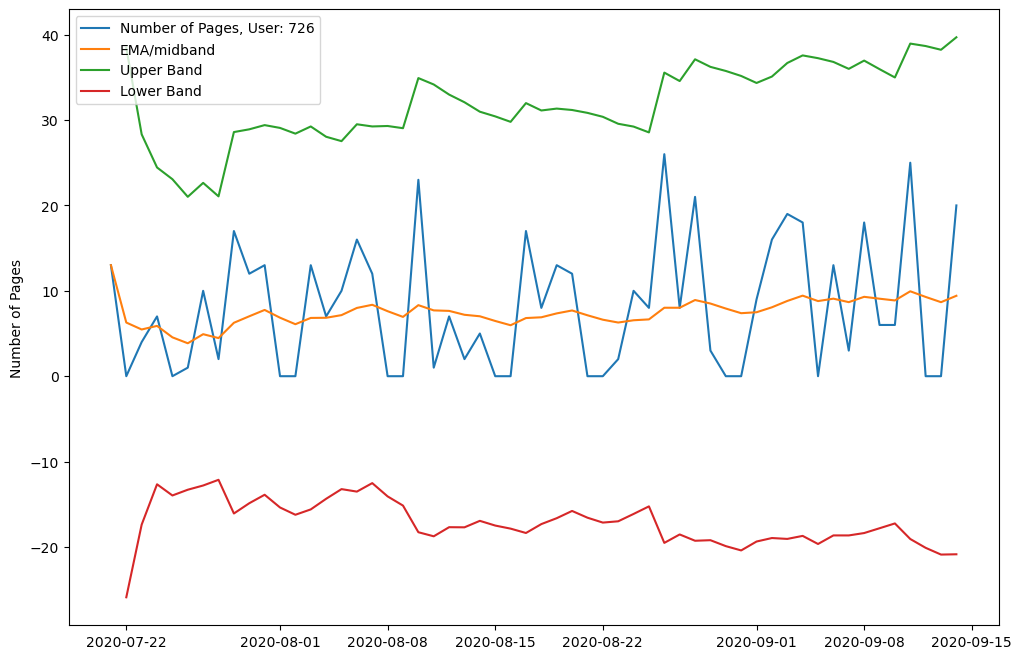

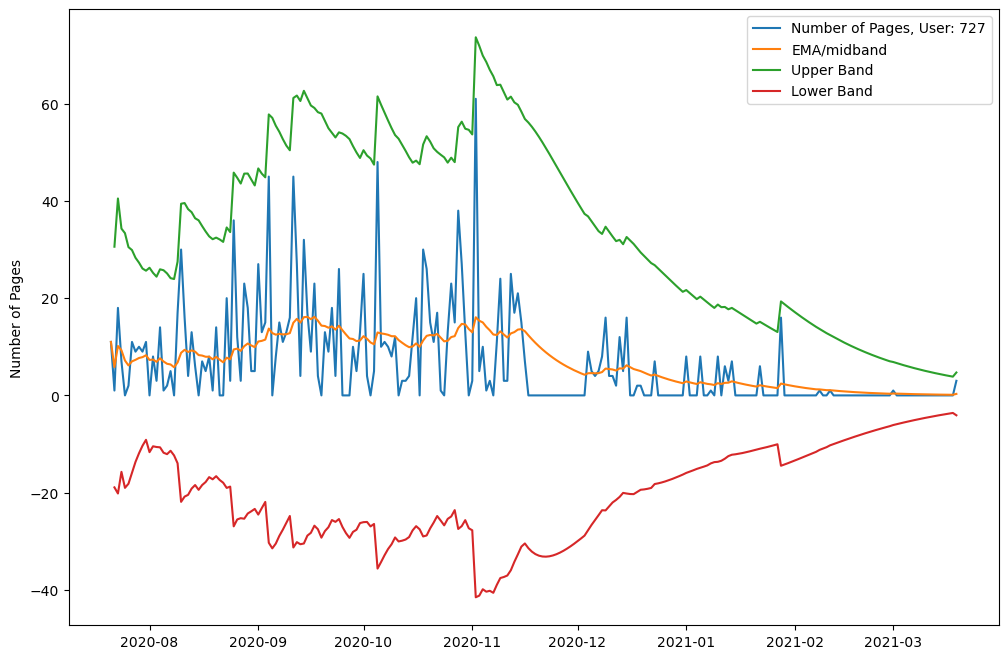

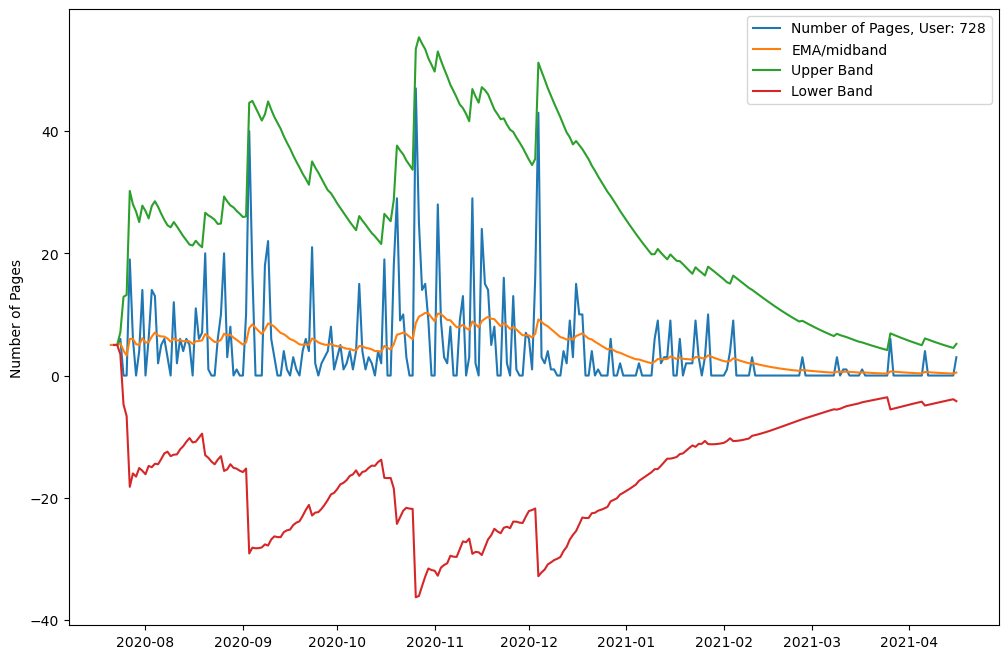

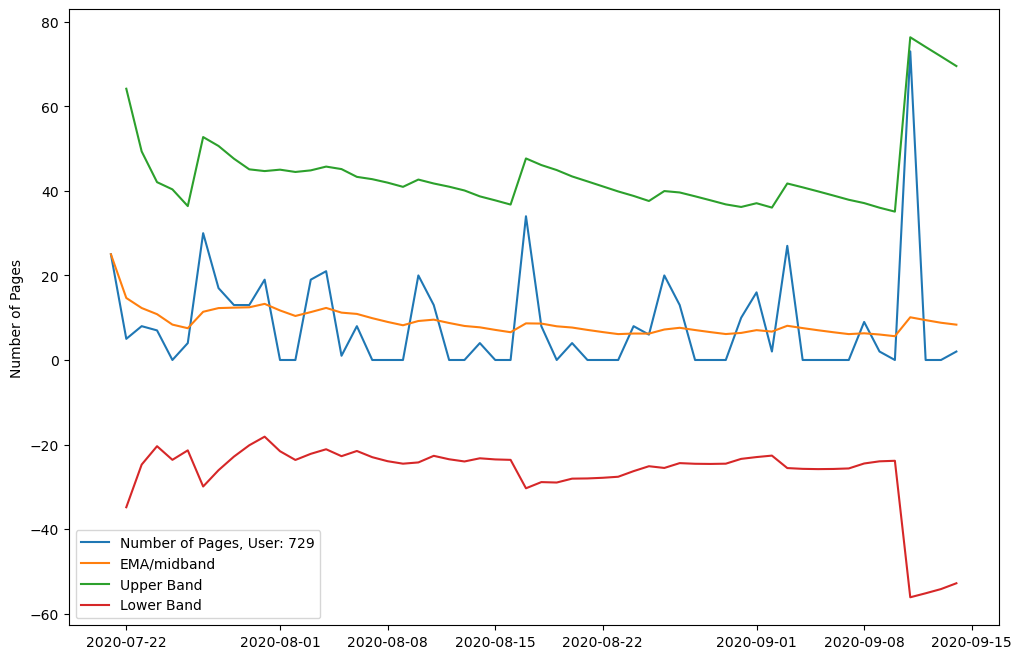

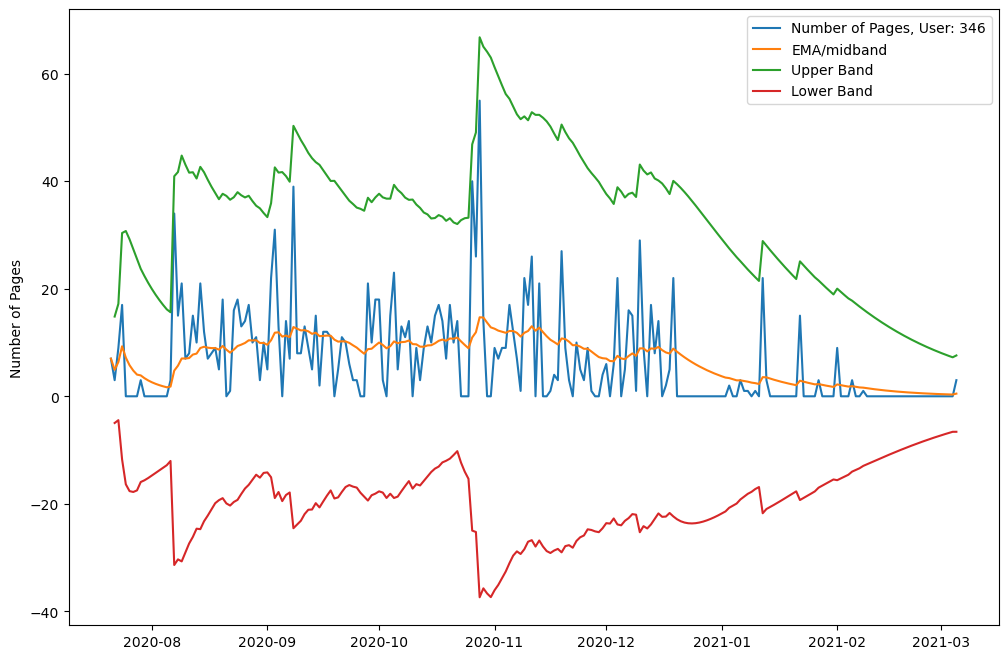

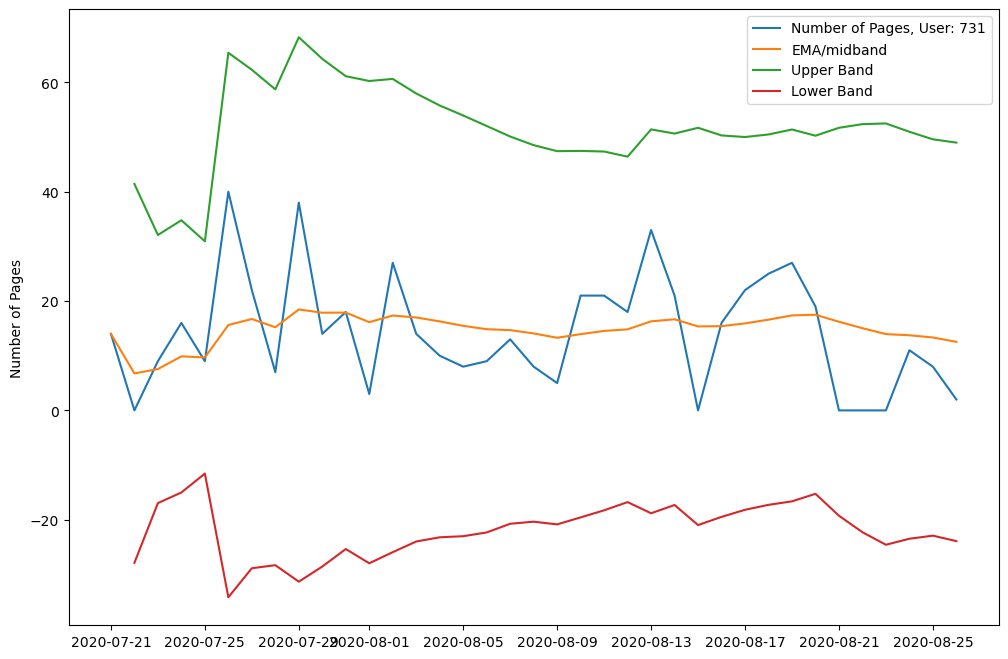

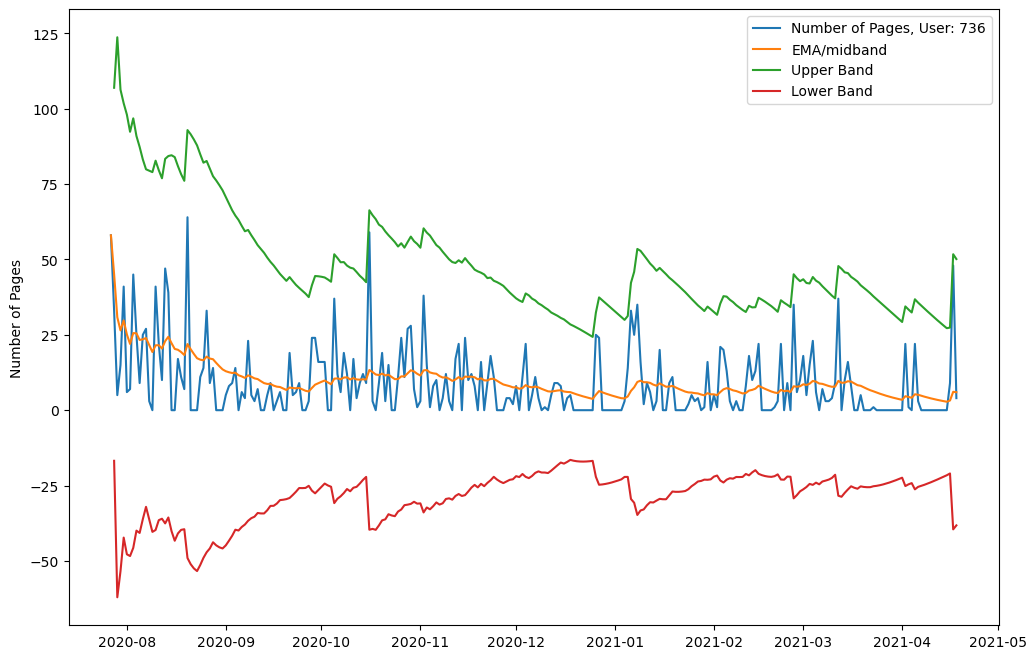

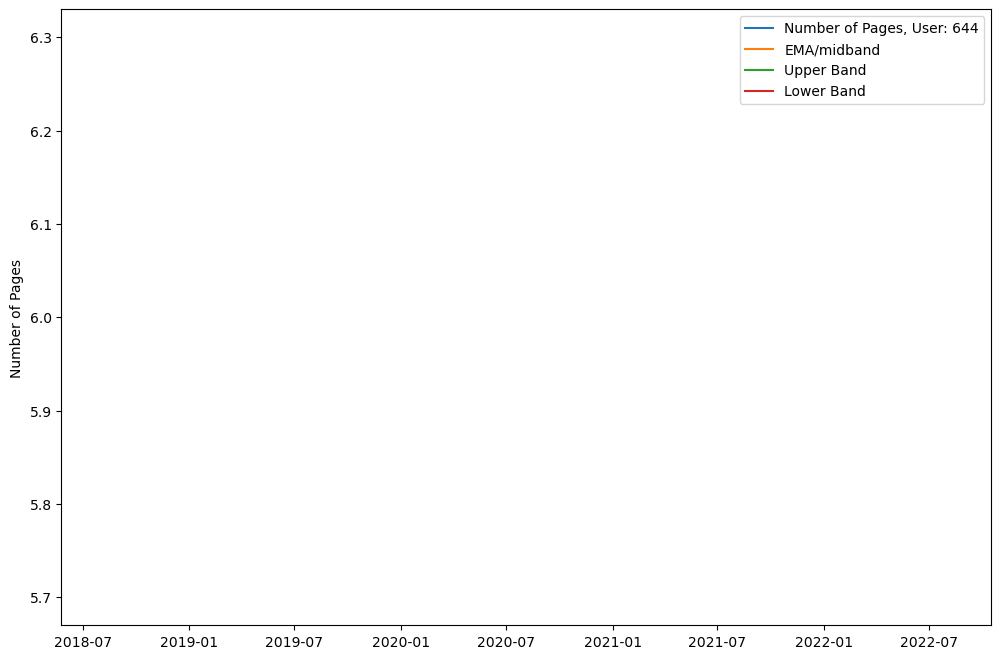

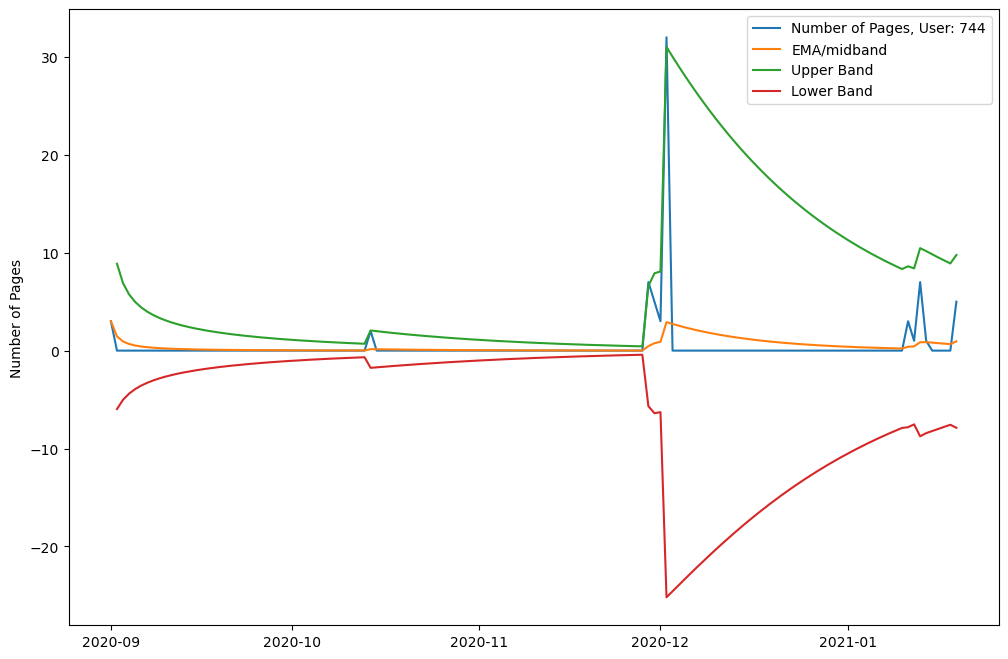

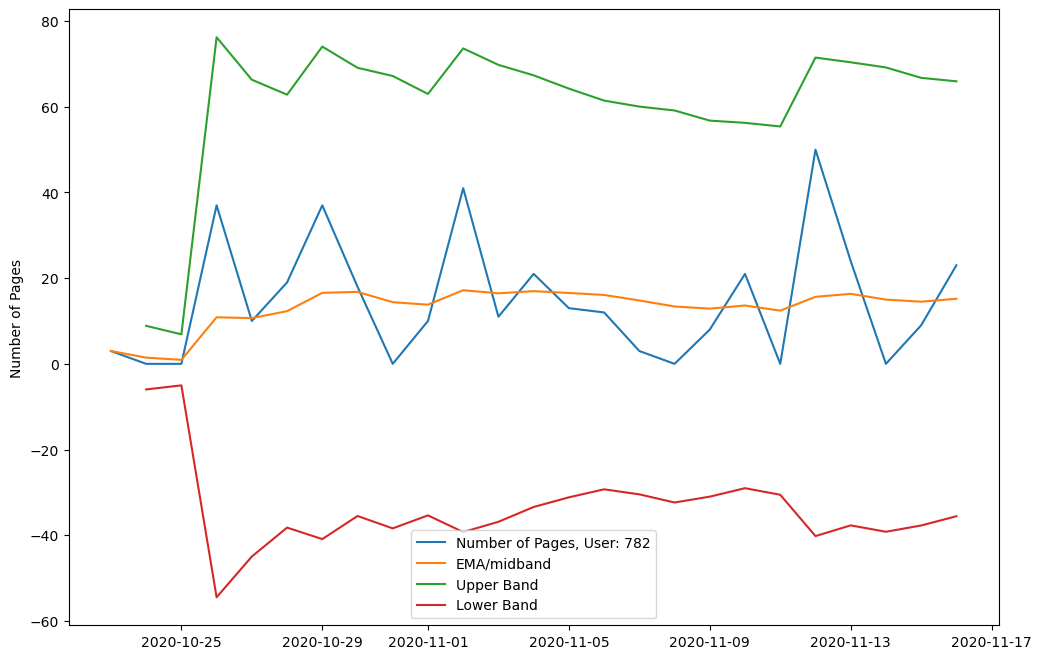

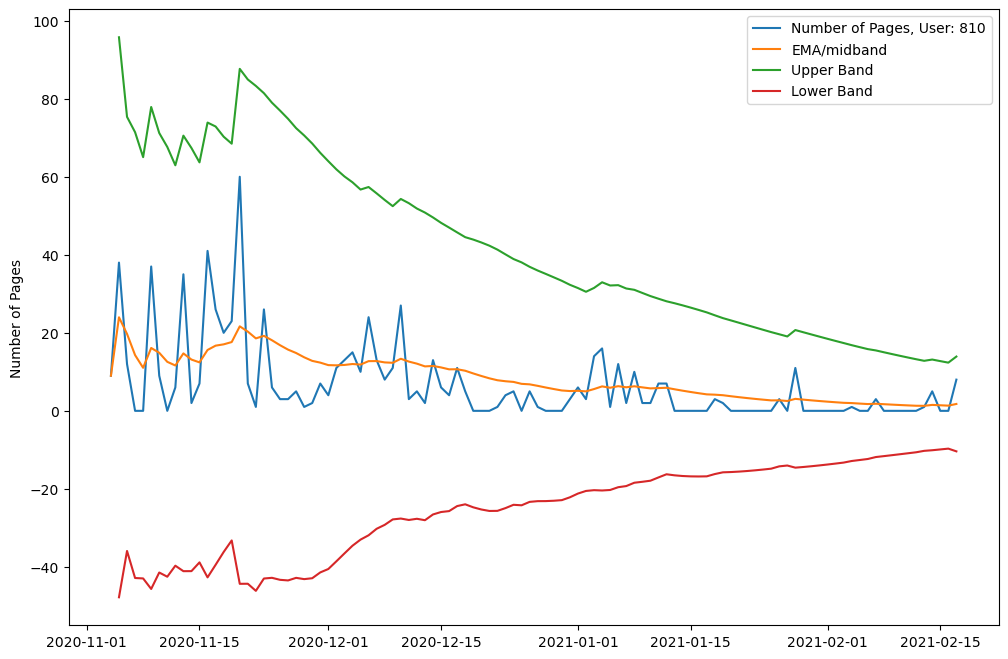

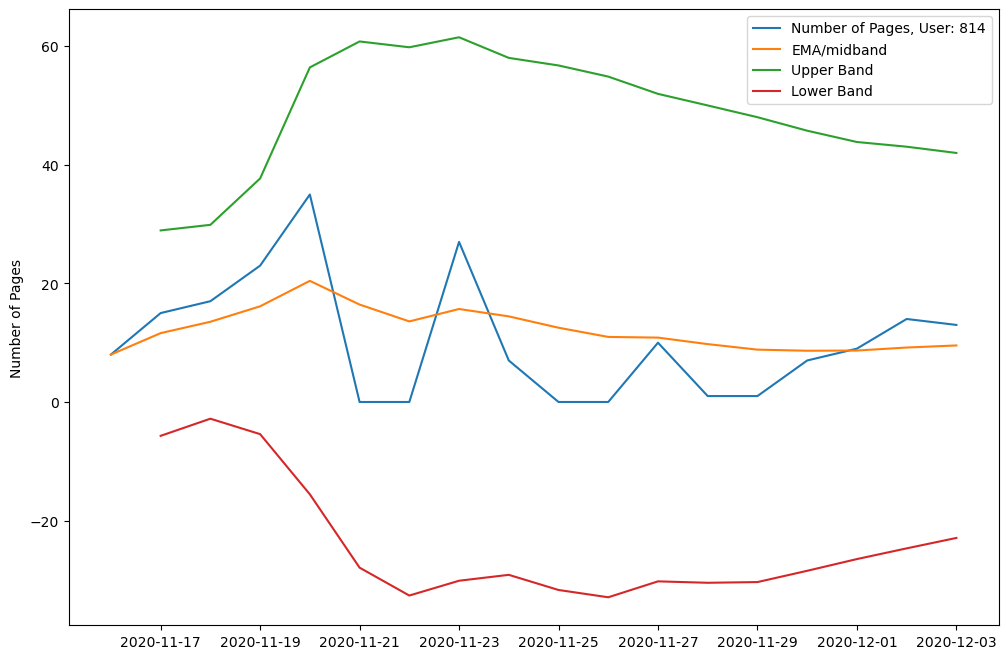

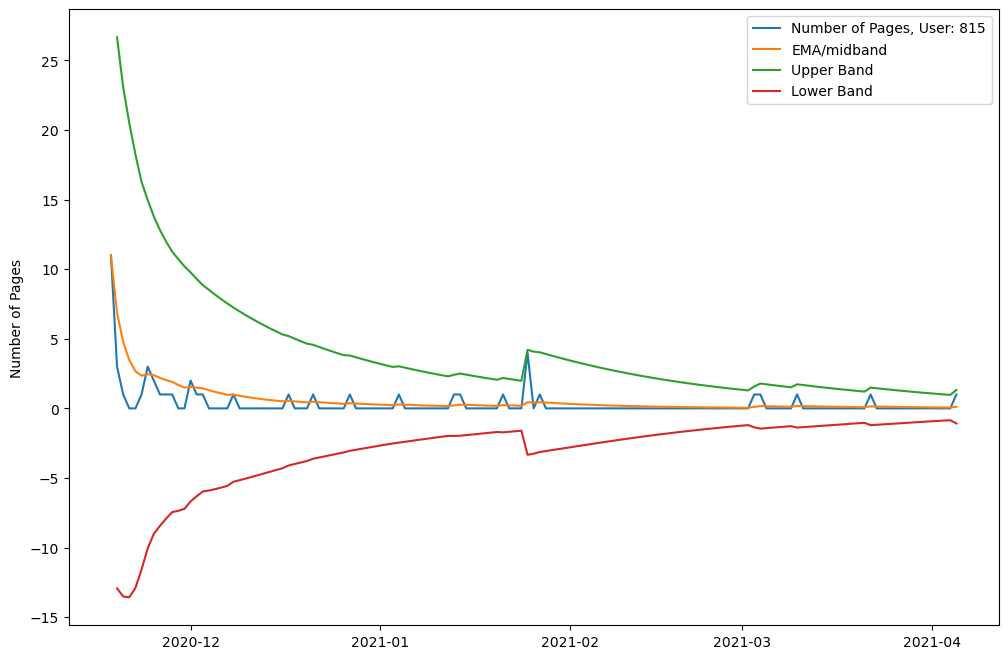

In [49]:
span = 30
weight = 3.5
# here we are looping through all user ids
anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [50]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('freq'),
        left_index=True,
        right_index=True,
    )

In [51]:
ip_df = value_counts_and_frequencies(df.source_ip)
ip_df.head()

count      freq
97.105.19.58   15931  0.301193
70.117.16.60    1903  0.035978
67.11.117.74    1729  0.032689
70.94.165.107   1715  0.032424
23.116.170.48   1616  0.030552

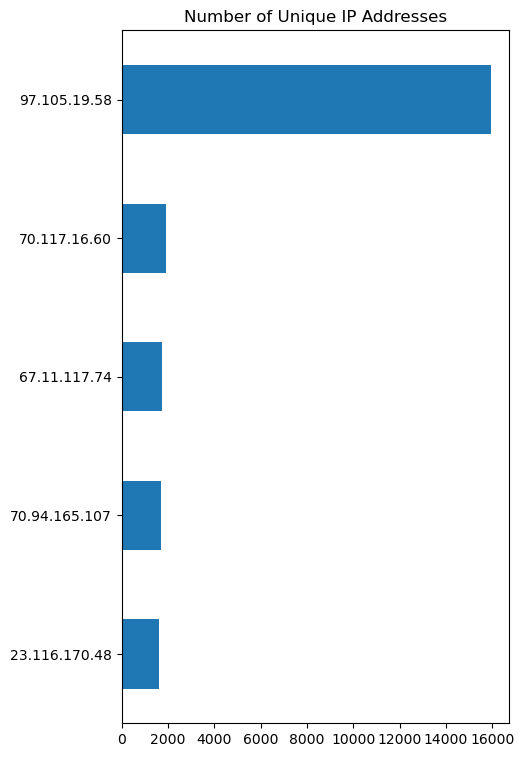

In [52]:
ip_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))
plt.title('Number of Unique IP Addresses')
plt.show()

In [53]:
user_tagged_ip = (
    df.groupby('source_ip')
    .user_id.value_counts(normalize=True)
    .rename('freq_user_tagged_ip')
    .reset_index()
)
user_tagged_ip[(user_tagged_ip['freq_user_tagged_ip'] > 0.5) & (user_tagged_ip['freq_user_tagged_ip'] < 1)]

source_ip  user_id  freq_user_tagged_ip
104       156.80.4.2      349             0.946281
122  170.248.173.247       58             0.682927
244  216.177.165.194      367             0.888889
306     67.11.117.74      719             0.786003
319   68.201.219.223      429             0.550129
333     70.117.16.60      716             0.998949
335     70.117.6.133      111             0.694656
339     70.120.16.42      729             0.972414
348     70.121.163.5       61             0.779070
356   70.123.200.120      810             0.521212
361    70.123.209.40       62             0.571429
369    70.94.165.107      727             0.892128
389    72.181.105.81      372             0.728778
394   72.181.113.170      403             0.593137
414   76.185.211.152      346             0.997321
419     76.204.27.88      406             0.574257
454     97.105.19.61       61             0.593640

   
## 5. At some point in 2019, the ability for students and alumni to access both curricula (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
    

In [55]:
df = acquire_curlogs()

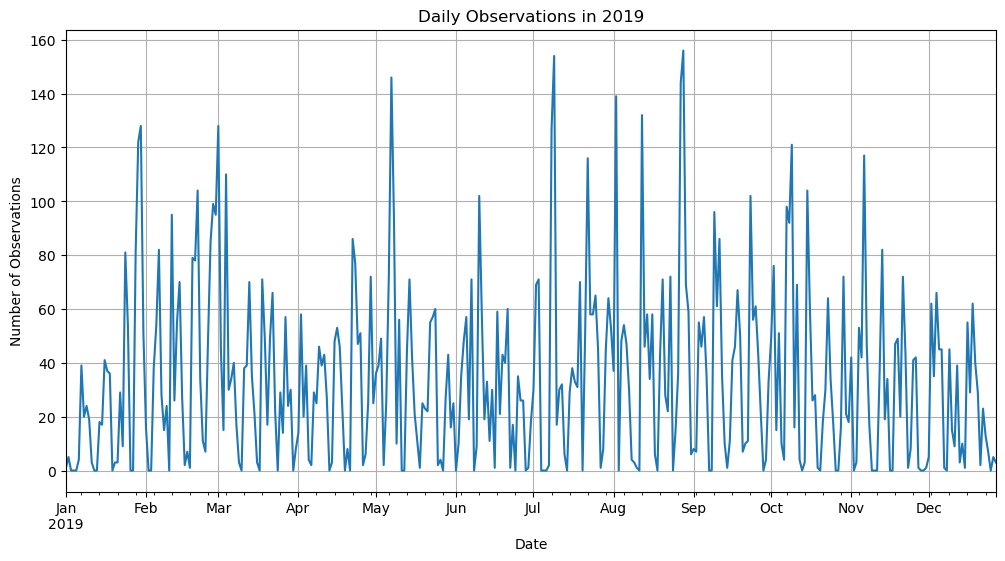

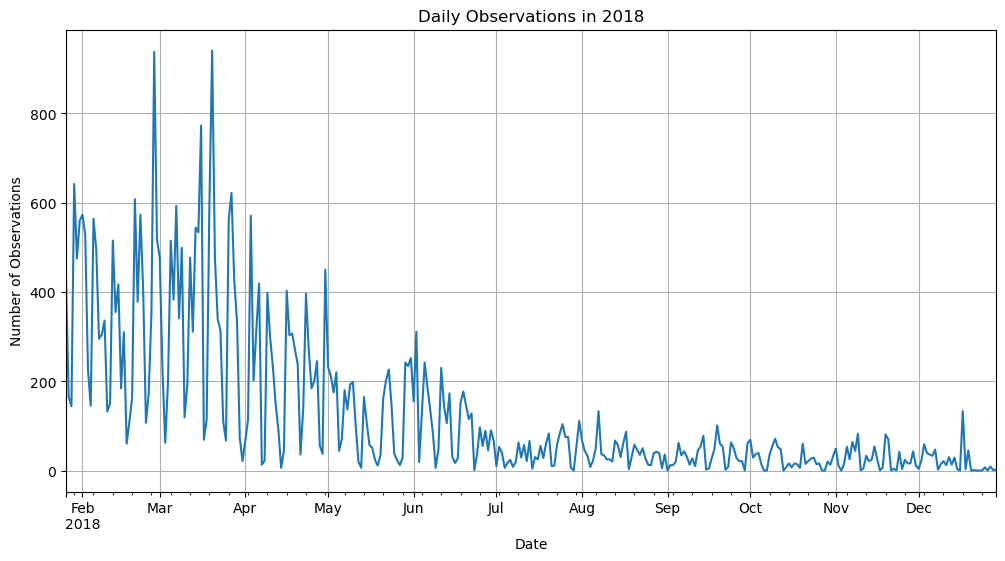

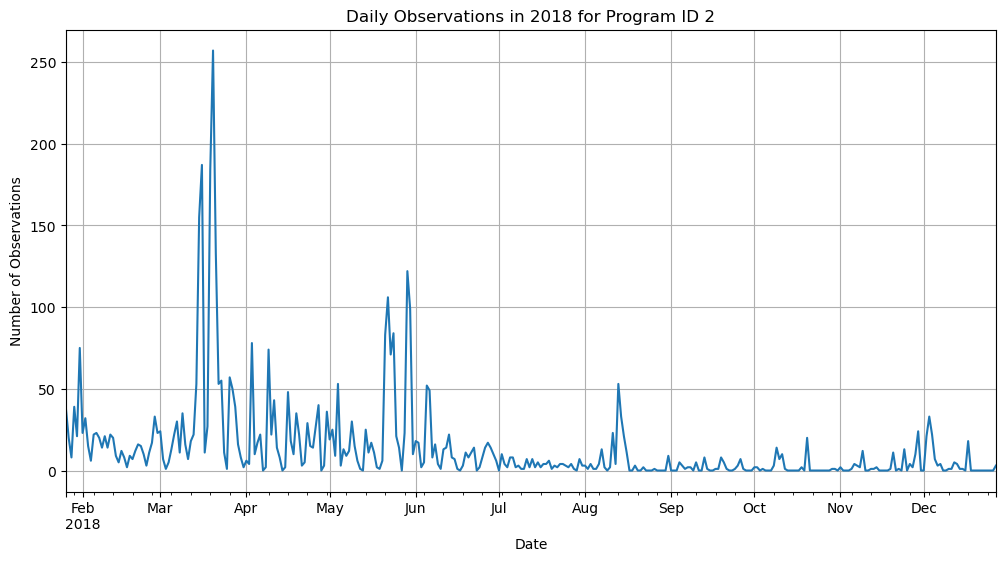

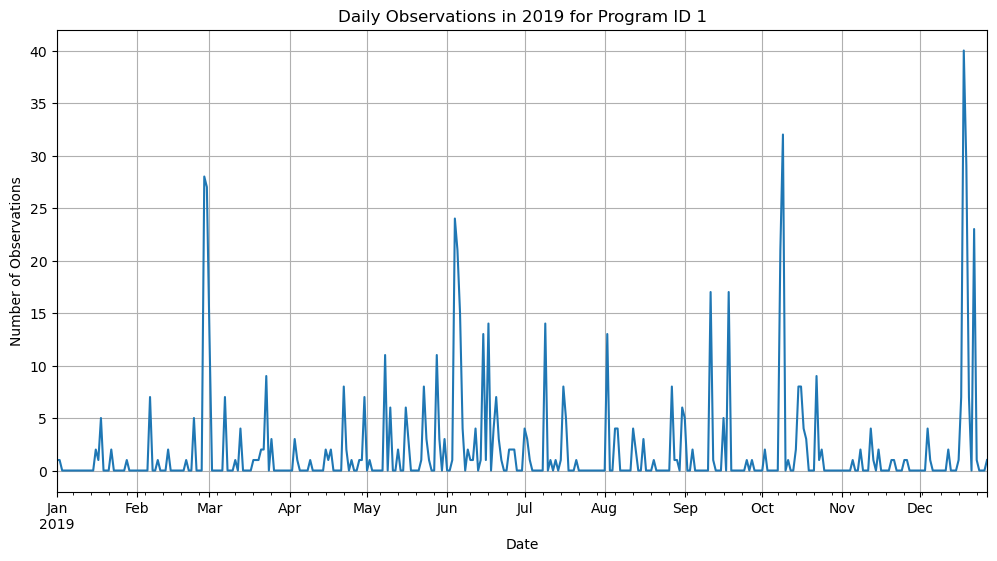

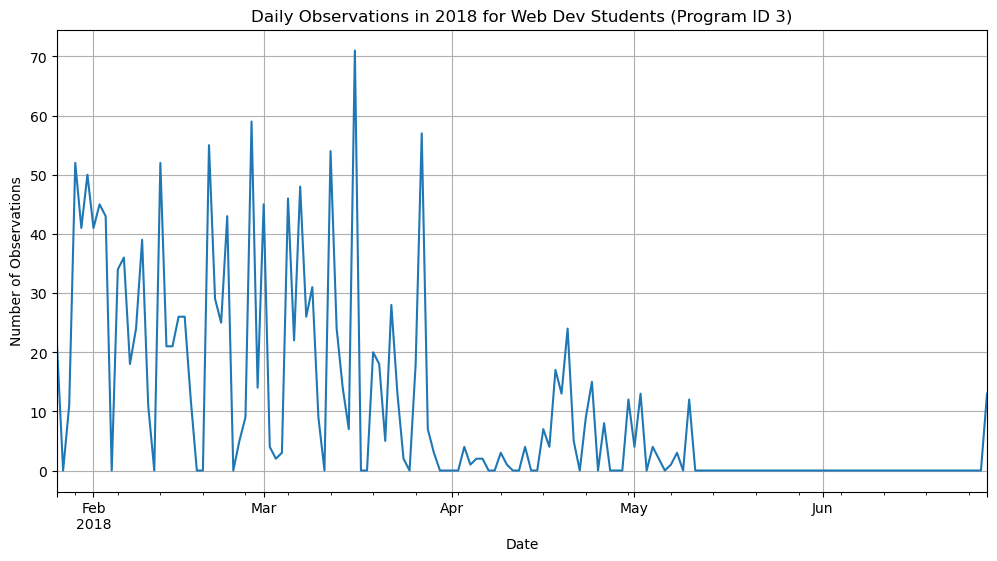

In [56]:

#cell 1
df.date = pd.to_datetime(df['date'])
df = df.set_index(df.date)

#cell 2
# Filter the DataFrame to select dates within the year 2018
dates_in_2018 = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2018-12-31')]
# Filter the DataFrame to select dates within the year 2019
dates_in_2019 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-12-31')]
# Filter the DataFrame to select dates within the year 2020
dates_in_2020 = df[(df['date'] >= '2020-01-01') & (df['date'] <= '2020-12-31')]

#cell 3
# Filter data for 2019
df_2019 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-12-31')]
# Convert 'date' column to datetime
df_2019['date'] = pd.to_datetime(df_2019['date'])
# Set the 'date' column as the index
df_2019.set_index('date', inplace=True)
# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2019['program_id'].resample('D').count()
# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Observations in 2019')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

#cell 4
# Filter data for 2019
df_2018 = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2018-12-31')]
# Convert 'date' column to datetime
df_2018['date'] = pd.to_datetime(df_2018['date'])
# Set the 'date' column as the index
df_2018.set_index('date', inplace=True)
# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2018['program_id'].resample('D').count()
# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Observations in 2018')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

#cell 5
datascience_df = df[~df['endpoint'].str.contains('javascript|html|css|spring|java|bootstrap|web-design|jquery|mkdocs|search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]
webdev_df = df[df['endpoint'].str.contains('javascript|css|html|bootstrap|web-design|jquery|mkdocs|search_index.json|spring|flask|virtual-enviornments|ajax|php|slides/sessions_and_cookies|slides/console_io|slides', case=False, na=False, regex=True)]

#cell 6
datascience_df['ds_endpoint'] = datascience_df['endpoint'].apply(lambda x: x + ' (ds)')
webdev_df['wd_endpoint'] = webdev_df['endpoint'].apply(lambda x: x + ' (web)')

#cell 7
# Filter data for 2018
df_2018 = datascience_df[(datascience_df['date'] >= '2018-01-01') & (datascience_df['date'] <= '2018-12-31')]
# Convert 'date' column to datetime
df_2018['date'] = pd.to_datetime(df_2018['date'])
# Set the 'date' column as the index
df_2018.set_index('date', inplace=True)
# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2018[df_2018['program_id'] == 2].resample('D').count()
# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts['program_id'].plot()
plt.title('Daily Observations in 2018 for Program ID 2')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

#cell 8
# Filter data for 2019
df_2019 = datascience_df[(datascience_df['date'] >= '2019-01-01') & (datascience_df['date'] <= '2019-12-31')]
# Convert 'date' column to datetime
df_2019['date'] = pd.to_datetime(df_2019['date'])
# Set the 'date' column as the index
df_2019.set_index('date', inplace=True)
# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2019[df_2019['program_id'] == 2].resample('D').count()
# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts['program_id'].plot()
plt.title('Daily Observations in 2019 for Program ID 1')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()

#cell 9
# Filter data for 2018
df_2018 = webdev_df[(webdev_df['date'] >= '2018-01-01') & (webdev_df['date'] <= '2018-12-31')]
# Convert 'date' column to datetime
df_2018['date'] = pd.to_datetime(df_2018['date'])
# Set the 'date' column as the index
df_2018.set_index('date', inplace=True)
# Resample the data to daily frequency and count the number of observations per day
daily_counts = df_2018[df_2018['program_id'] == 3].resample('D').count()
# Plot the daily counts
plt.figure(figsize=(12, 6))
daily_counts['program_id'].plot()
plt.title('Daily Observations in 2018 for Web Dev Students (Program ID 3)')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.show()